In [ ]:
! pip install covid19dh
! pip install --upgrade covid19dh

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from covid19dh import covid19

In [ ]:
data, src = covid19()
data

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


id       date  confirmed  deaths  recovered  tests  vaccines  \
65898  0094b645 2020-01-03        NaN     NaN        NaN    NaN       NaN   
65899  0094b645 2020-01-04        NaN     NaN        NaN    NaN       NaN   
65900  0094b645 2020-01-05        NaN     NaN        NaN    NaN       NaN   
65901  0094b645 2020-01-06        NaN     NaN        NaN    NaN       NaN   
65902  0094b645 2020-01-07        NaN     NaN        NaN    NaN       NaN   
...         ...        ...        ...     ...        ...    ...       ...   
24123  fd169ad6 2023-02-23        NaN     NaN    21285.0    NaN       NaN   
24124  fd169ad6 2023-02-24        NaN     NaN    21286.0    NaN       NaN   
24125  fd169ad6 2023-02-25        NaN     NaN    21288.0    NaN       NaN   
24126  fd169ad6 2023-02-26        NaN     NaN    21293.0    NaN       NaN   
24127  fd169ad6 2023-02-27        NaN     NaN    21294.0    NaN       NaN   

       people_vaccinated  people_fully_vaccinated  hosp  ...  iso_alpha_3  \
65898                NaN                      NaN   NaN  ...          LCA   
65899                NaN                      NaN   NaN  ...          LCA   
65900                NaN                      NaN   NaN  ...          LCA   
65901                NaN                      NaN   NaN  ...          LCA   
65902                NaN                      NaN   NaN  ...          LCA   
...                  ...                      ...   ...  ...          ...   
24123                NaN                      NaN   NaN  ...          LIE   
24124                NaN                      NaN   NaN  ...          LIE   
24125                NaN                      NaN   NaN  ...          LIE   
24126                NaN                      NaN   NaN  ...          LIE   
24127                NaN                      NaN   NaN  ...          LIE   

       iso_alpha_2  iso_numeric  iso_currency  key_local  \
65898           LC        662.0           XCD        NaN   
65899           LC        662.0           XCD        NaN   
65900           LC        662.0           XCD        NaN   
65901           LC        662.0           XCD        NaN   
65902           LC        662.0           XCD        NaN   
...            ...          ...           ...        ...   
24123           LI        438.0           CHF        NaN   
24124           LI        438.0           CHF        NaN   
24125           LI        438.0           CHF        NaN   
24126           LI        438.0           CHF        NaN   
24127           LI        438.0           CHF        NaN   

               key_google_mobility  key_apple_mobility  key_jhu_csse  \
65898                          NaN                 NaN            LC   
65899                          NaN                 NaN            LC   
65900                          NaN                 NaN            LC   
65901                          NaN                 NaN            LC   
65902                          NaN                 NaN            LC   
...                            ...                 ...           ...   
24123  ChIJ_S9HHUQxm0cRibFa3Ta16mA                 NaN            LI   
24124  ChIJ_S9HHUQxm0cRibFa3Ta16mA                 NaN            LI   
24125  ChIJ_S9HHUQxm0cRibFa3Ta16mA                 NaN            LI   
24126  ChIJ_S9HHUQxm0cRibFa3Ta16mA                 NaN            LI   
24127  ChIJ_S9HHUQxm0cRibFa3Ta16mA                 NaN            LI   

       key_nuts  key_gadm  
65898       NaN       LCA  
65899       NaN       LCA  
65900       NaN       LCA  
65901       NaN       LCA  
65902       NaN       LCA  
...         ...       ...  
24123       NaN       LIE  
24124       NaN       LIE  
24125       NaN       LIE  
24126       NaN       LIE  
24127       NaN       LIE  

[286891 rows x 47 columns]

## Wybór państwa

In [ ]:
nan_means = {}

for country in data.iso_alpha_3.dropna().unique():
    subset = data[data.iso_alpha_3 == country]
    nan_mean = subset.isnull().mean().round(3) * 100
    nan_means[country] = np.sum(nan_mean) / nan_mean.shape[0]

nan_means_df = pd.DataFrame(list(nan_means.items()), columns=['Country', 'NaN Percentage'])

nan_means_df = nan_means_df.sort_values(by='NaN Percentage')
nan_means_df

Country  NaN Percentage
29      LTU        9.468085
138     CHL       12.242553
182     PER       13.619149
42      PRT       15.234043
39      EST       15.297872
..      ...             ...
147     TKL       74.385106
119     PCN       74.389362
210     NIU       74.431915
221     VGB       74.491489
96      SHN       79.129787

[233 rows x 2 columns]

In [ ]:
data = data[data.iso_alpha_3 == 'LTU']
data

id       date  confirmed  deaths  recovered      tests   vaccines  \
4004  1fcde6ae 2020-03-20        7.0     0.0        0.0      137.0        0.0   
4005  1fcde6ae 2020-03-21       30.0     0.0        0.0      473.0        0.0   
4006  1fcde6ae 2020-03-22       58.0     0.0        0.0      749.0        0.0   
4007  1fcde6ae 2020-03-23       88.0     1.0        0.0      978.0        0.0   
4008  1fcde6ae 2020-03-24      112.0     2.0        0.0     1381.0        0.0   
...        ...        ...        ...     ...        ...        ...        ...   
4823  1fcde6ae 2022-06-17  1065140.0  9159.0  1037940.0  8717852.0  4487453.0   
4824  1fcde6ae 2022-06-18  1065173.0  9159.0  1037921.0  8718079.0  4487466.0   
4825  1fcde6ae 2022-06-19  1065194.0  9163.0  1038024.0  8718285.0  4487476.0   
4826  1fcde6ae 2022-06-20  1065519.0  9163.0  1038186.0  8719481.0  4487596.0   
4827  1fcde6ae 2022-06-21  1065781.0  9163.0  1038300.0  8720346.0  4487755.0   

      people_vaccinated  people_fully_vaccinated  hosp  ...  iso_alpha_3  \
4004                0.0                      0.0   0.0  ...          LTU   
4005                0.0                      0.0   0.0  ...          LTU   
4006                0.0                      0.0   0.0  ...          LTU   
4007                0.0                      0.0   0.0  ...          LTU   
4008                0.0                      0.0   0.0  ...          LTU   
...                 ...                      ...   ...  ...          ...   
4823          1952173.0                1820140.0  57.0  ...          LTU   
4824          1952176.0                1820141.0  57.0  ...          LTU   
4825          1952176.0                1820142.0  57.0  ...          LTU   
4826          1952191.0                1820189.0  61.0  ...          LTU   
4827          1952230.0                1820231.0  63.0  ...          LTU   

      iso_alpha_2  iso_numeric  iso_currency  key_local  \
4004           LT        440.0           LTL        NaN   
4005           LT        440.0           LTL        NaN   
4006           LT        440.0           LTL        NaN   
4007           LT        440.0           LTL        NaN   
4008           LT        440.0           LTL        NaN   
...           ...          ...           ...        ...   
4823           LT        440.0           LTL        NaN   
4824           LT        440.0           LTL        NaN   
4825           LT        440.0           LTL        NaN   
4826           LT        440.0           LTL        NaN   
4827           LT        440.0           LTL        NaN   

              key_google_mobility  key_apple_mobility  key_jhu_csse  key_nuts  \
4004  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4005  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4006  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4007  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4008  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
...                           ...                 ...           ...       ...   
4823  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4824  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4825  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4826  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   
4827  ChIJE74zDxSU3UYRubpdpdNUCvM           Lithuania            LT       NaN   

      key_gadm  
4004       LTU  
4005       LTU  
4006       LTU  
4007       LTU  
4008       LTU  
...        ...  
4823       LTU  
4824       LTU  
4825       LTU  
4826       LTU  
4827       LTU  

[824 rows x 47 columns]

## Usunięcie niepotrzebnych zmiennych do modelowania

In [ ]:
data.population.unique()

array([2801543.])

In [ ]:
data = data \
    .drop(["id",
          "administrative_area_level",
          "administrative_area_level_1",
          "administrative_area_level_2",
          "administrative_area_level_3",
          "latitude", "longitude",
          "iso_alpha_3", "iso_alpha_2",
          "iso_numeric", "iso_currency",
          "key_local", "key_google_mobility",
          "key_apple_mobility", "key_jhu_csse",
          "key_nuts", "key_gadm", "population"
          ],
          axis=1) \
    .reset_index(drop=True)
data

date  confirmed  deaths  recovered      tests   vaccines  \
0   2020-03-20        7.0     0.0        0.0      137.0        0.0   
1   2020-03-21       30.0     0.0        0.0      473.0        0.0   
2   2020-03-22       58.0     0.0        0.0      749.0        0.0   
3   2020-03-23       88.0     1.0        0.0      978.0        0.0   
4   2020-03-24      112.0     2.0        0.0     1381.0        0.0   
..         ...        ...     ...        ...        ...        ...   
819 2022-06-17  1065140.0  9159.0  1037940.0  8717852.0  4487453.0   
820 2022-06-18  1065173.0  9159.0  1037921.0  8718079.0  4487466.0   
821 2022-06-19  1065194.0  9163.0  1038024.0  8718285.0  4487476.0   
822 2022-06-20  1065519.0  9163.0  1038186.0  8719481.0  4487596.0   
823 2022-06-21  1065781.0  9163.0  1038300.0  8720346.0  4487755.0   

     people_vaccinated  people_fully_vaccinated  hosp  icu  ...  \
0                  0.0                      0.0   0.0  0.0  ...   
1                  0.0                      0.0   0.0  0.0  ...   
2                  0.0                      0.0   0.0  0.0  ...   
3                  0.0                      0.0   0.0  0.0  ...   
4                  0.0                      0.0   0.0  0.0  ...   
..                 ...                      ...   ...  ...  ...   
819          1952173.0                1820140.0  57.0  5.0  ...   
820          1952176.0                1820141.0  57.0  5.0  ...   
821          1952176.0                1820142.0  57.0  5.0  ...   
822          1952191.0                1820189.0  61.0  3.0  ...   
823          1952230.0                1820231.0  63.0  5.0  ...   

     information_campaigns  testing_policy  contact_tracing  facial_coverings  \
0                      2.0             1.0              0.0               0.0   
1                      2.0             1.0              0.0               0.0   
2                      2.0             1.0              0.0               0.0   
3                      2.0             1.0              0.0               0.0   
4                      2.0             1.0              0.0               0.0   
..                     ...             ...              ...               ...   
819                    NaN             NaN              NaN               NaN   
820                    NaN             NaN              NaN               NaN   
821                    NaN             NaN              NaN               NaN   
822                    NaN             NaN              NaN               NaN   
823                    NaN             NaN              NaN               NaN   

     vaccination_policy  elderly_people_protection  government_response_index  \
0                   0.0                        1.0                      53.12   
1                   0.0                        1.0                      53.12   
2                   0.0                        1.0                      53.12   
3                   0.0                        1.0                      53.12   
4                   0.0                        1.0                      53.12   
..                  ...                        ...                        ...   
819                 NaN                        NaN                        NaN   
820                 NaN                        NaN                        NaN   
821                 NaN                        NaN                        NaN   
822                 NaN                        NaN                        NaN   
823                 NaN                        NaN                        NaN   

     stringency_index  containment_health_index  economic_support_index  
0               81.48                     57.14                    25.0  
1               81.48                     57.14                    25.0  
2               81.48                     57.14                    25.0  
3               81.48                     57.14                    25.0  
4               81.48                     57.14 

Dane dla zliczeń są skumulowane

## Rozwiązanie problemu brakujących wartości i zmiana typów danych

In [ ]:
pd.isnull(data).mean().round(3)*100

date                                   0.0
confirmed                              0.0
deaths                                 0.0
recovered                              0.0
tests                                  0.0
vaccines                               0.0
people_vaccinated                      0.0
people_fully_vaccinated                0.0
hosp                                   0.0
icu                                    0.0
vent                                   0.0
school_closing                         2.5
workplace_closing                      2.5
cancel_events                          2.5
gatherings_restrictions                2.5
transport_closing                      2.5
stay_home_restrictions                 2.5
internal_movement_restrictions         2.5
international_movement_restrictions    2.5
information_campaigns                  2.5
testing_policy                         2.5
contact_tracing                        2.5
facial_coverings                       2.5
vaccination

### Wygenerowanie wykresów, zmiana wartości ujemnych na dodatnie
Z dokumentacji: "The negative sign is used solely to distinguish the two cases, it should not be treated as a real negative value."

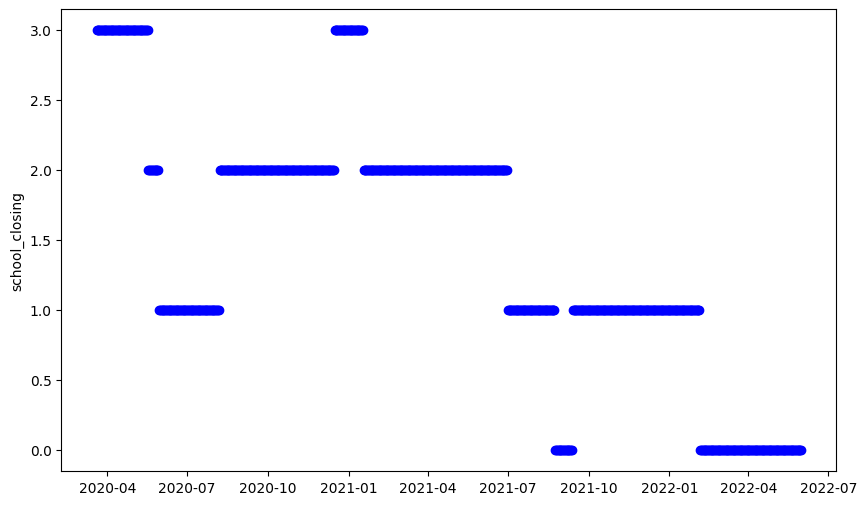

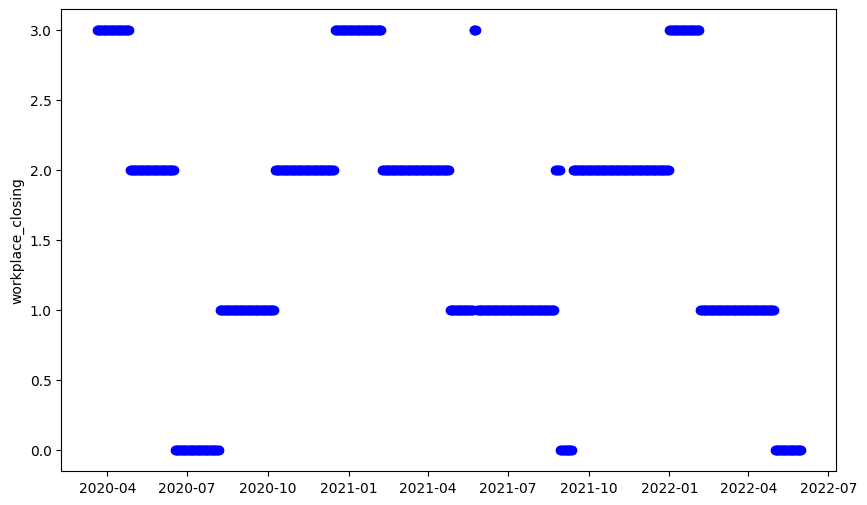

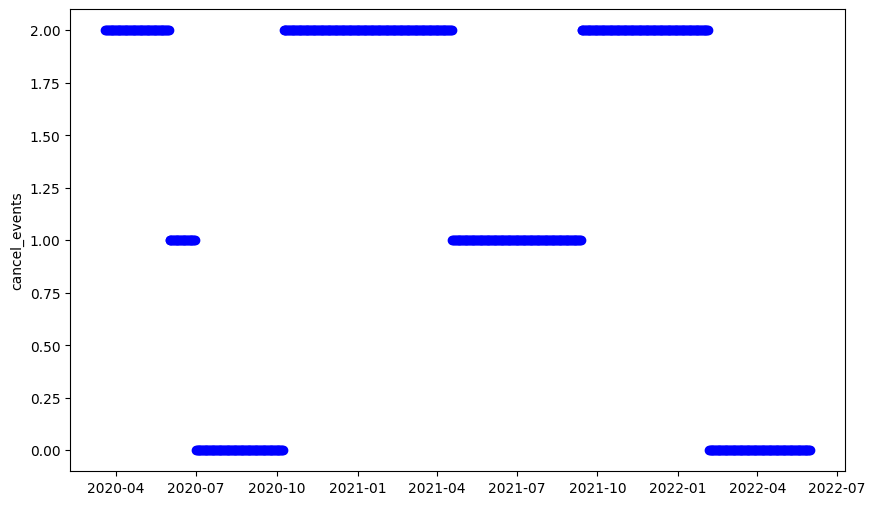

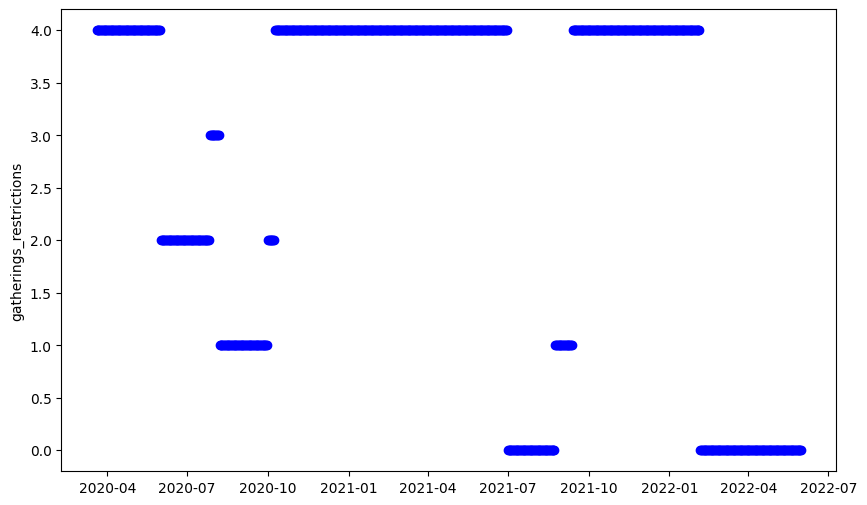

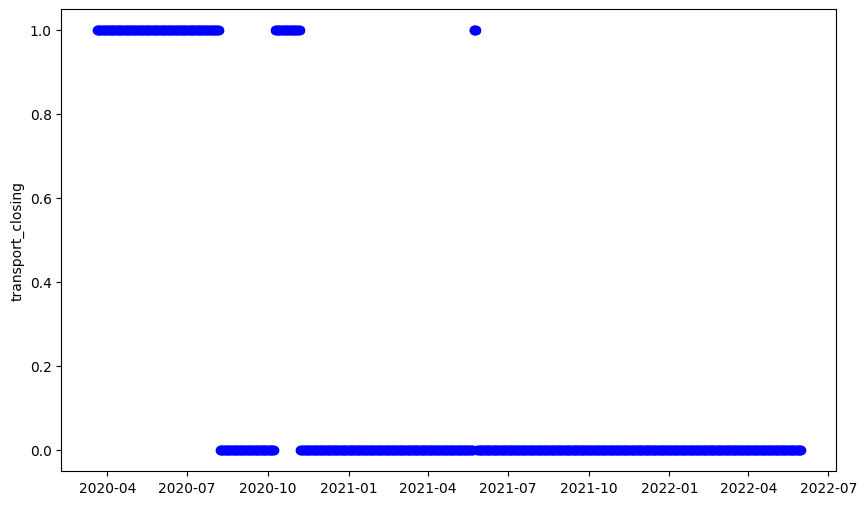

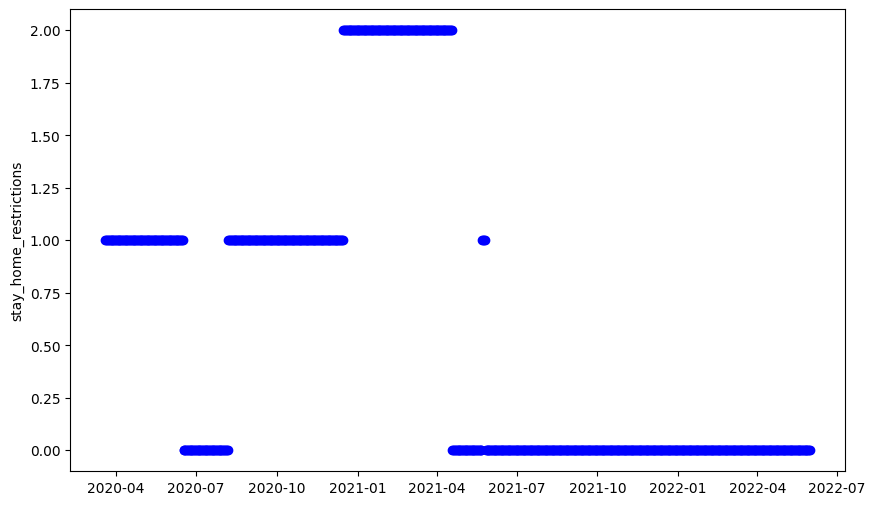

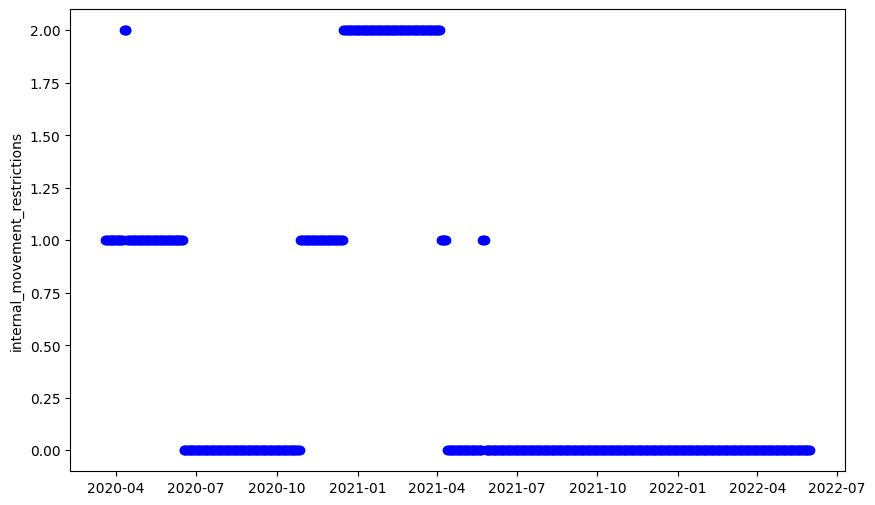

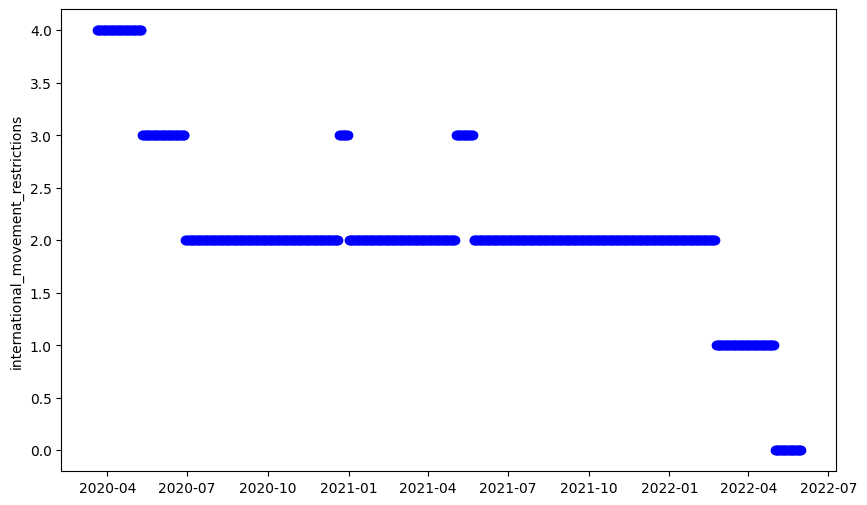

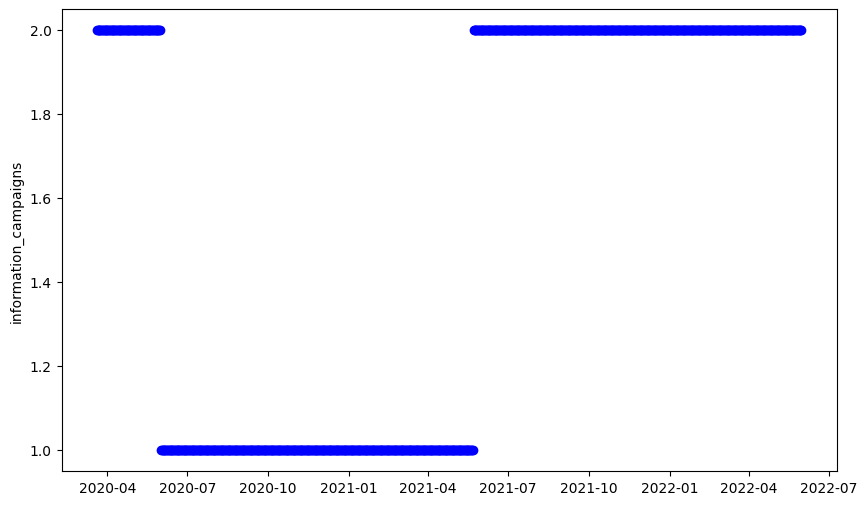

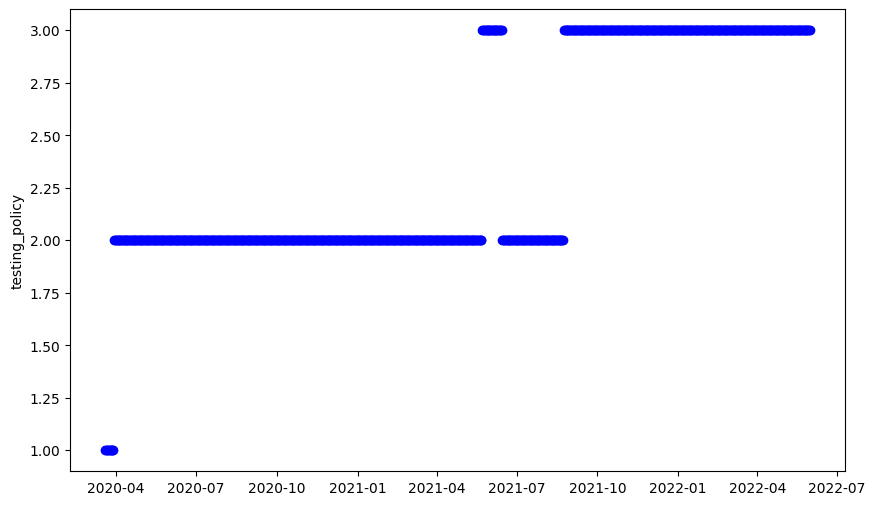

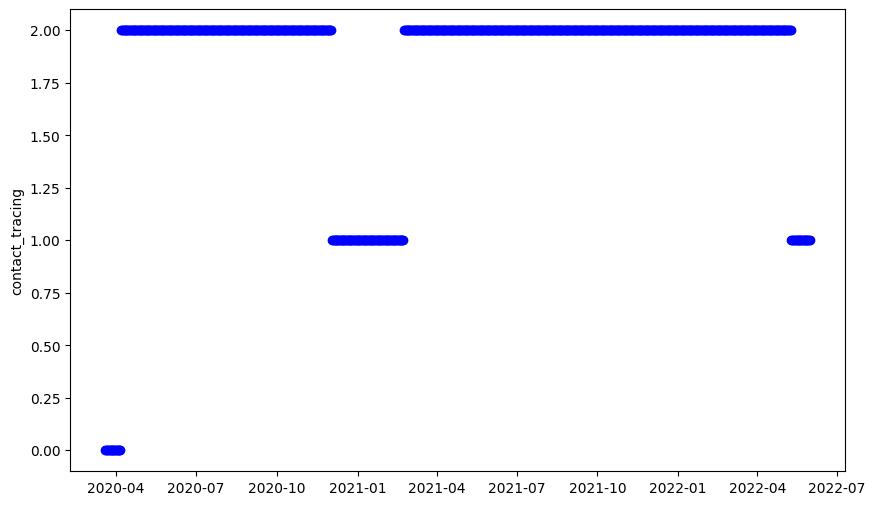

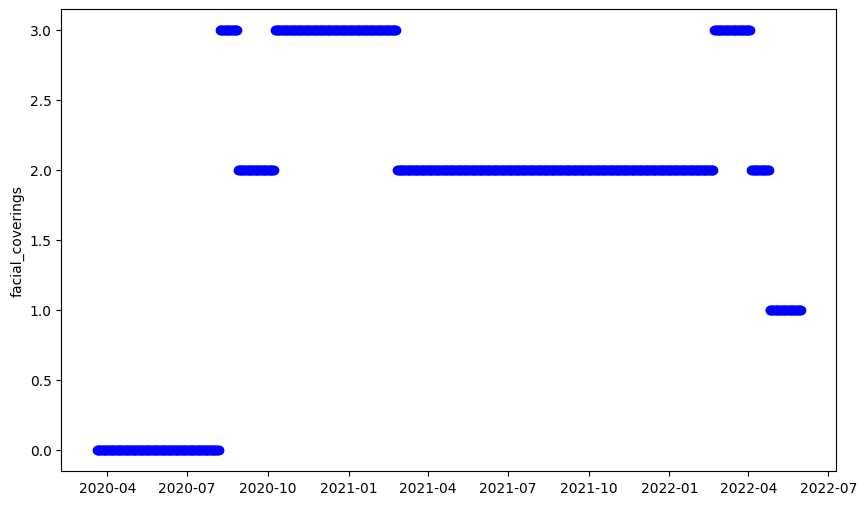

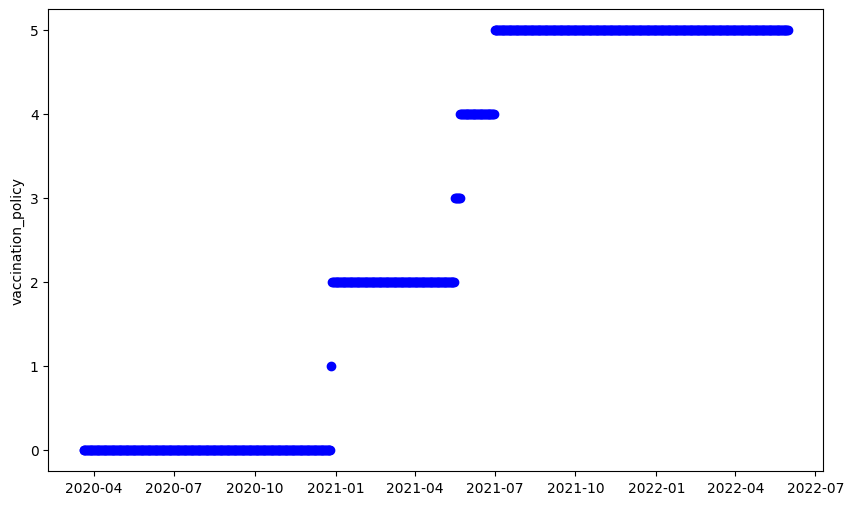

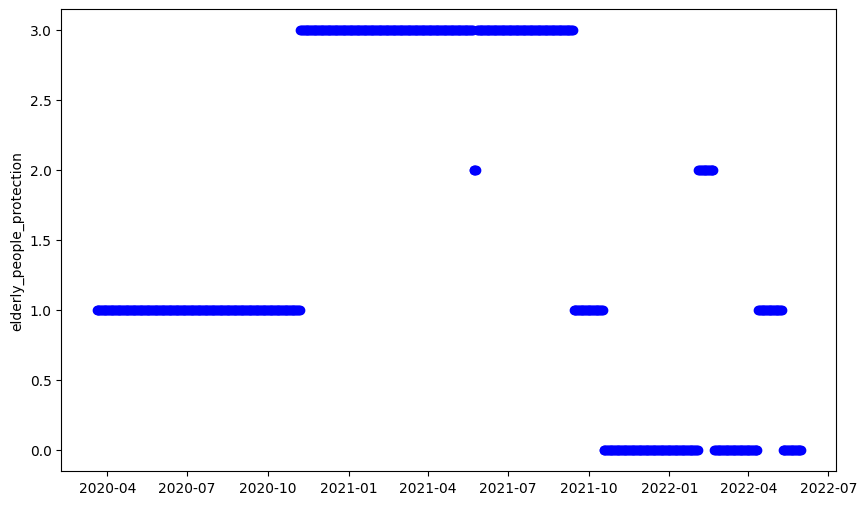

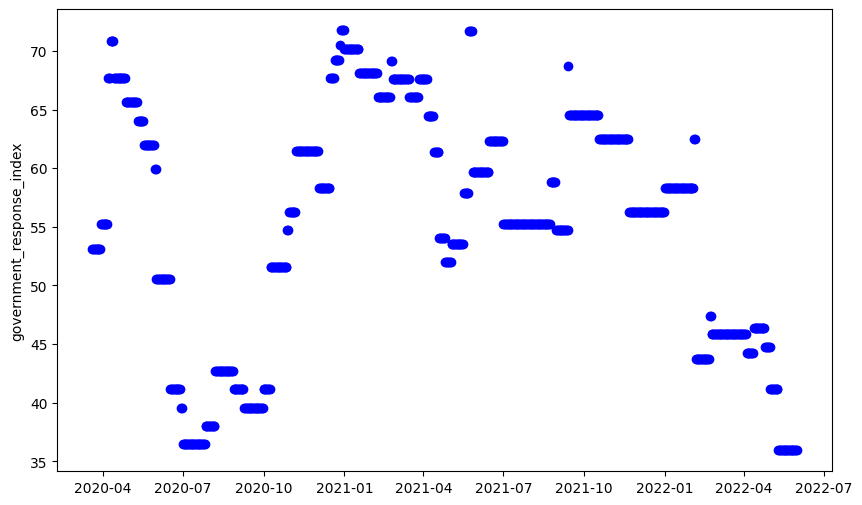

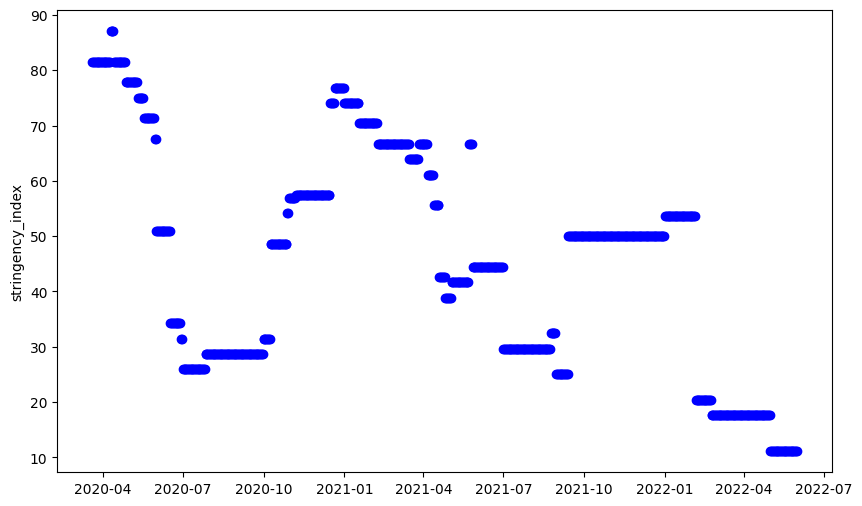

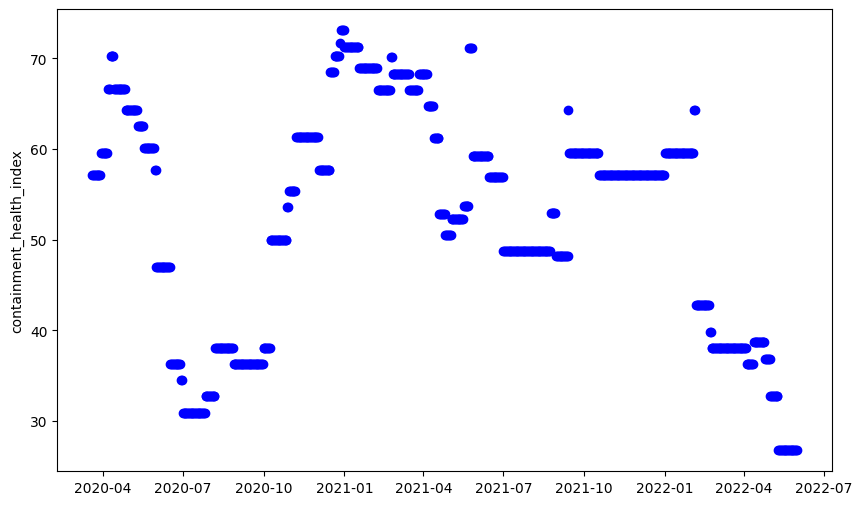

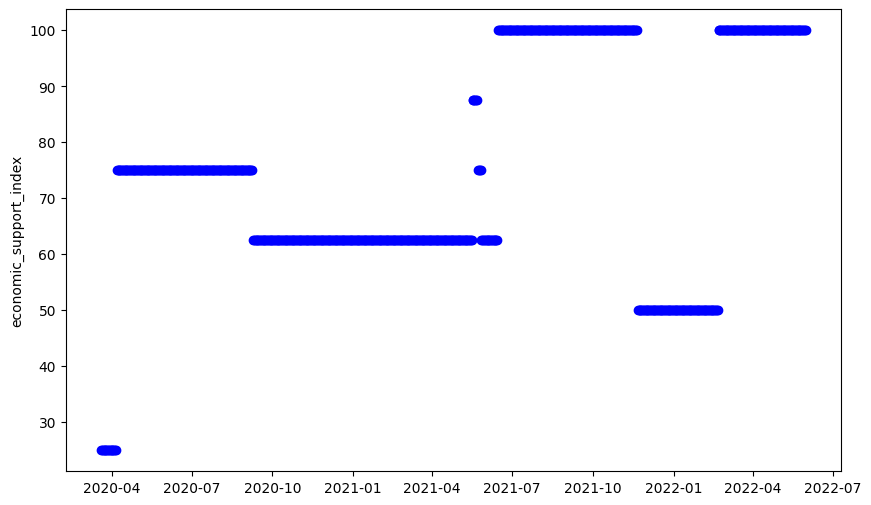

In [ ]:
columns_na = [
    "school_closing",
    "workplace_closing",
    "cancel_events",
    "gatherings_restrictions",
    "transport_closing",
    "stay_home_restrictions",
    "internal_movement_restrictions",
    "international_movement_restrictions",
    "information_campaigns",
    "testing_policy",
    "contact_tracing",
    "facial_coverings",
    "vaccination_policy",
    "elderly_people_protection",
    "government_response_index",
    "stringency_index",
    "containment_health_index",
    "economic_support_index"
]


for column in columns_na:
    data[column] = data[column].abs()
    plt.figure(figsize=(10, 6))
    plt.scatter(data['date'], data[column], marker='o',  color='b')
    plt.ylabel(column)

Zastąpimy NA najnowszą wartością

In [ ]:
data = data.fillna(method='ffill')

In [ ]:
data.dtypes

date                                   datetime64[ns]
confirmed                                     float64
deaths                                        float64
recovered                                     float64
tests                                         float64
vaccines                                      float64
people_vaccinated                             float64
people_fully_vaccinated                       float64
hosp                                          float64
icu                                           float64
vent                                          float64
school_closing                                float64
workplace_closing                             float64
cancel_events                                 float64
gatherings_restrictions                       float64
transport_closing                             float64
stay_home_restrictions                        float64
internal_movement_restrictions                float64
international_movement_restr

In [ ]:
data = data.astype({col: np.int32 for col in data.columns
                    if col != 'date' and col != 'government_response_index' and
                    col != 'containment_health_index' and
                    col != 'economic_support_index'})

## EDA

In [ ]:
data_cumulated = data.copy()
data['confirmed'] = data['confirmed'].diff().fillna(data['confirmed'])
data['deaths'] = data['deaths'].diff().fillna(data['deaths'])
data['recovered'] = data['recovered'].diff().fillna(data['recovered'])
data['tests'] = data['tests'].diff().fillna(data['tests'])
data['vaccines'] = data['vaccines'].diff().fillna(data['vaccines'])
data['people_vaccinated'] = data['people_vaccinated'].diff().fillna(data['people_vaccinated'])
data['people_fully_vaccinated'] = data['people_fully_vaccinated'].diff().fillna(data['people_fully_vaccinated'])

In [ ]:
data.describe()

date     confirmed      deaths     recovered  \
count                  824    824.000000  824.000000    824.000000   
mean   2021-05-05 12:00:00   1293.423544   11.120146   1260.072816   
min    2020-03-20 00:00:00      0.000000    0.000000    -19.000000   
25%    2020-10-11 18:00:00     52.750000    1.000000     42.000000   
50%    2021-05-05 12:00:00    589.000000    8.000000    450.500000   
75%    2021-11-27 06:00:00   1663.500000   18.000000   1492.000000   
max    2022-06-21 00:00:00  13235.000000   62.000000  17024.000000   
std                    NaN   2002.970264   11.948406   2191.801131   

              tests      vaccines  people_vaccinated  people_fully_vaccinated  \
count    824.000000    824.000000         824.000000               824.000000   
mean   10582.944175   5446.304612        2369.211165              2209.018204   
min      137.000000      0.000000           0.000000                 0.000000   
25%     4356.750000      0.000000           0.000000                 0.000000   
50%     8475.500000    522.500000          89.000000                71.500000   
75%    15272.750000   8991.000000        2791.750000              2368.250000   
max    35067.000000  41196.000000       29931.000000             26487.000000   
std     7868.281953   8351.620994        4343.887201              4396.001687   

              hosp         icu  ...  information_campaigns  testing_policy  \
count   824.000000  824.000000  ...             824.000000      824.000000   
mean    796.462379   68.464806  ...               1.567961        2.382282   
min       0.000000    0.000000  ...               1.000000        1.000000   
25%     112.000000   11.000000  ...               1.000000        2.000000   
50%     803.500000   67.500000  ...               2.000000        2.000000   
75%    1291.250000  113.250000  ...               2.000000        3.000000   
max    2571.000000  220.000000  ...               2.000000        3.000000   
std     691.875946   57.069515  ...               0.495661        0.510618   

       contact_tracing  facial_coverings  vaccination_policy  \
count       824.000000        824.000000          824.000000   
mean          1.804612          1.834951            2.712379   
min           0.000000          0.000000            0.000000   
25%           2.000000          2.000000            0.000000   
50%           2.000000          2.000000            2.000000   
75%           2.000000          2.000000            5.000000   
max           2.000000          3.000000            5.000000   
std           0.448492          0.984419            2.225674   

       elderly_people_protection  government_response_index  stringency_index  \
count                 824.000000                 824.000000        824.000000   
mean                    1.527913                  54.668010         44.339806   
min                     0.000000                  35.940000         11.000000   
25%                     1.000000                  45.830000         28.000000   
50%                     1.000000                  56.250000         48.000000   
75%                     3.000000                  62.500000         57.000000   
max                     3.000000                  71.770000         87.000000   
std                     1.218208                  10.397846         20.354180   

       containment_health_index  economic_support_index  
count                824.000000              824.000000  
mean                  51.675376               75.621966  
min                   26.790000               25.000000  
25%                   38.100000               62.500000  
50%                   56.900000               75.000000  
75%                   60.120000              100.000000  
max                   73.100000              100.000000  
std                   12.784070               19.723175  

[8 rows x 29 columns]

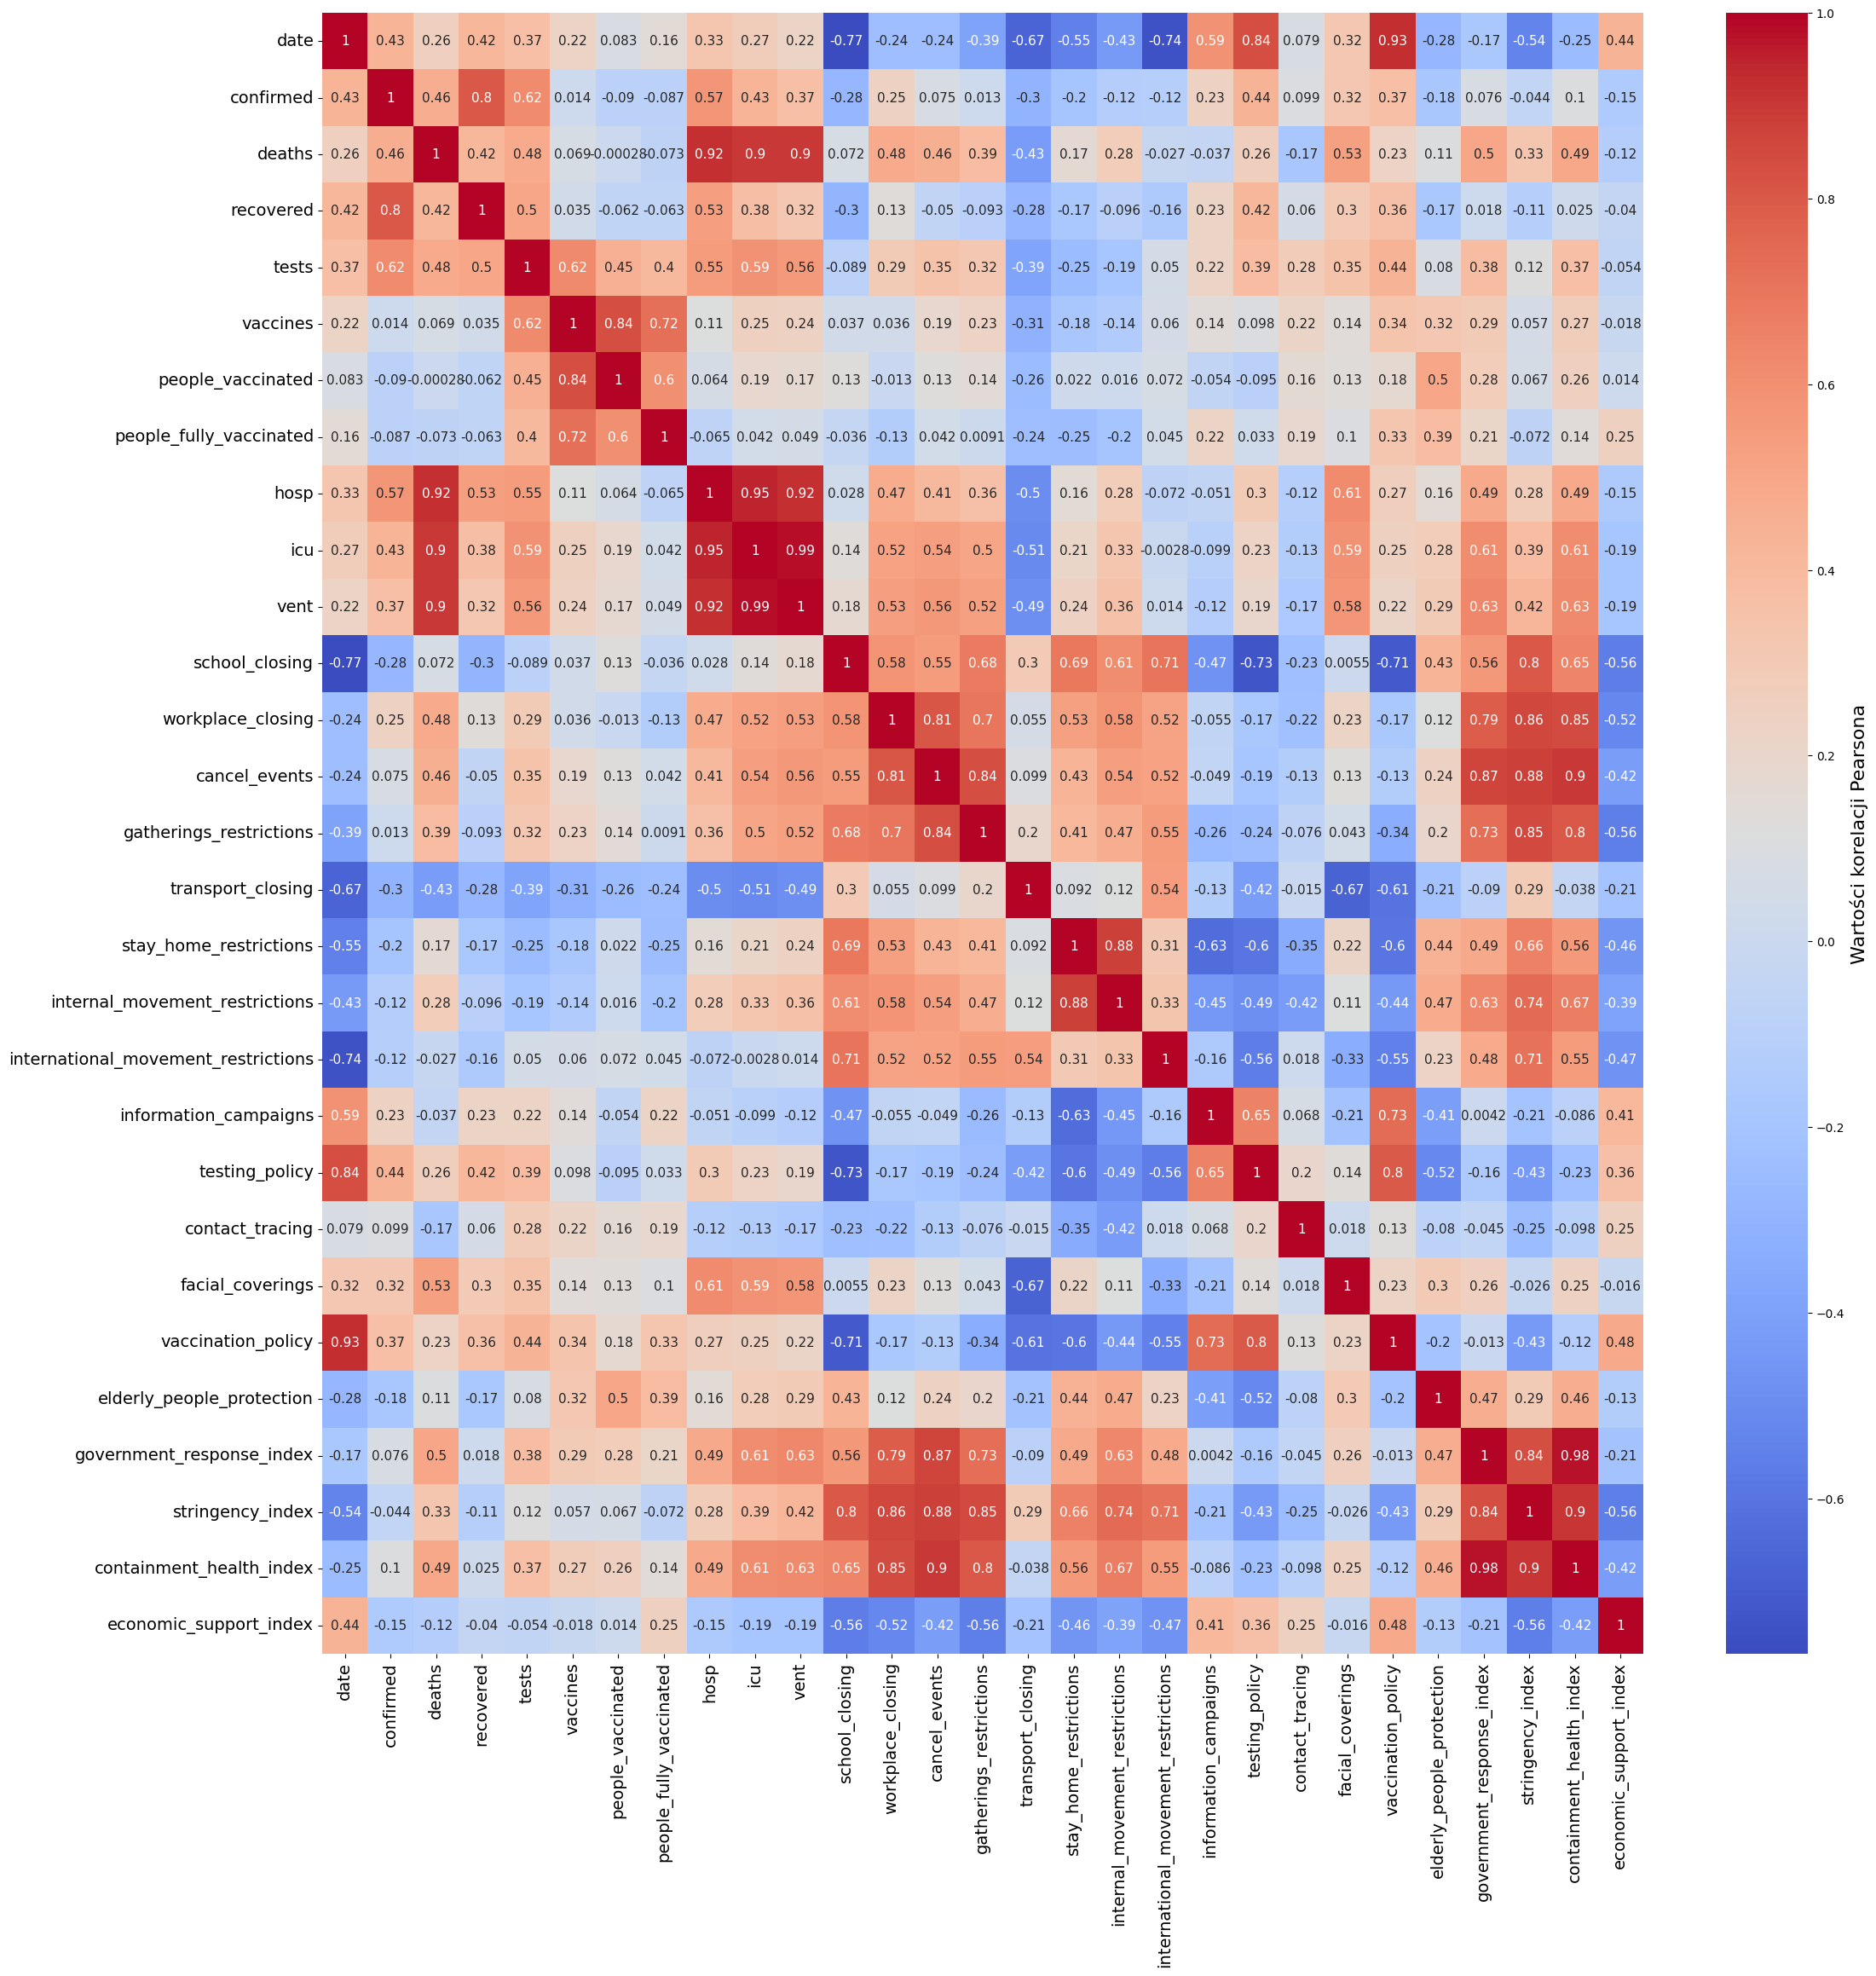

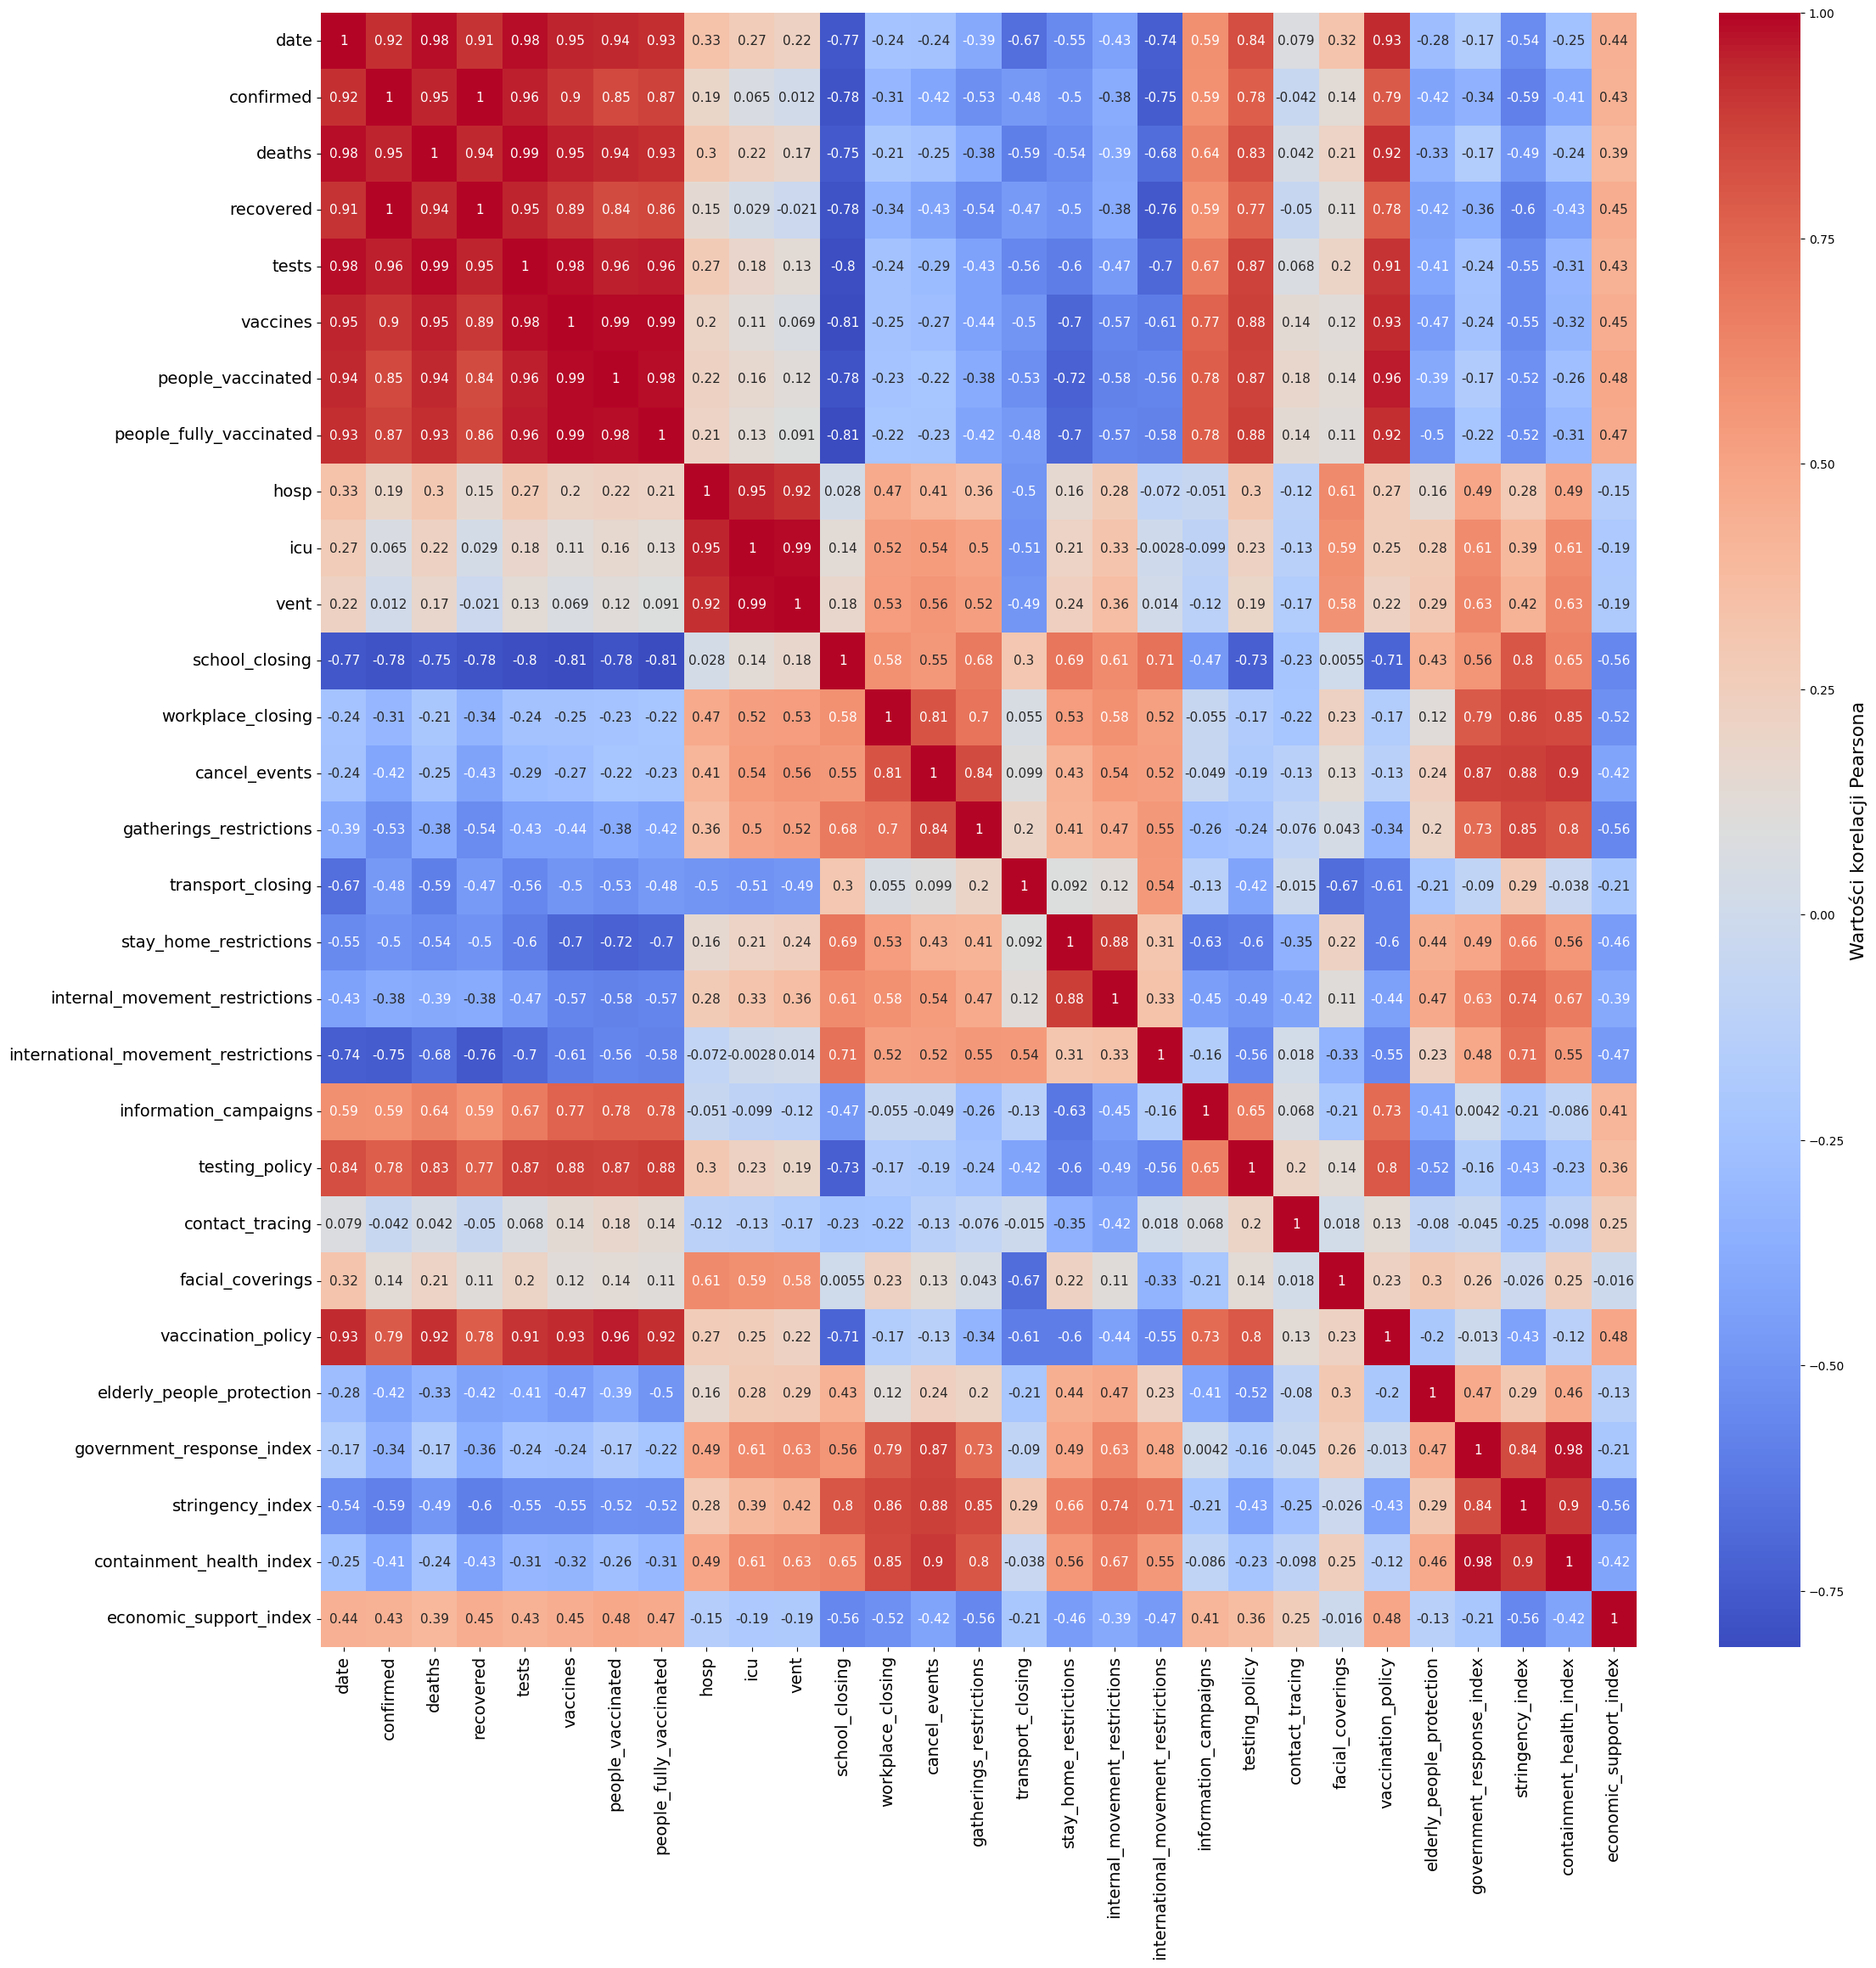

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(25, 25))
heatmap = sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, annot_kws={"size": 11})
_ = heatmap.set_yticklabels(corr_matrix.index, size=14)
_ = heatmap.set_xticklabels(heatmap.get_xticklabels(), size=14) #, rotation=45
colorbar = heatmap.collections[0].colorbar
_ = colorbar.set_label('Wartości korelacji Pearsona', size=16)

corr_matrix = data_cumulated.corr()
plt.figure(figsize=(25, 25))
heatmap2 = sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, annot_kws={"size": 11})
_ = heatmap2.set_yticklabels(corr_matrix.index, size=14)
_ = heatmap2.set_xticklabels(heatmap.get_xticklabels(), size=14) #, rotation=45
colorbar2 = heatmap2.collections[0].colorbar
_ = colorbar2.set_label('Wartości korelacji Pearsona', size=16)

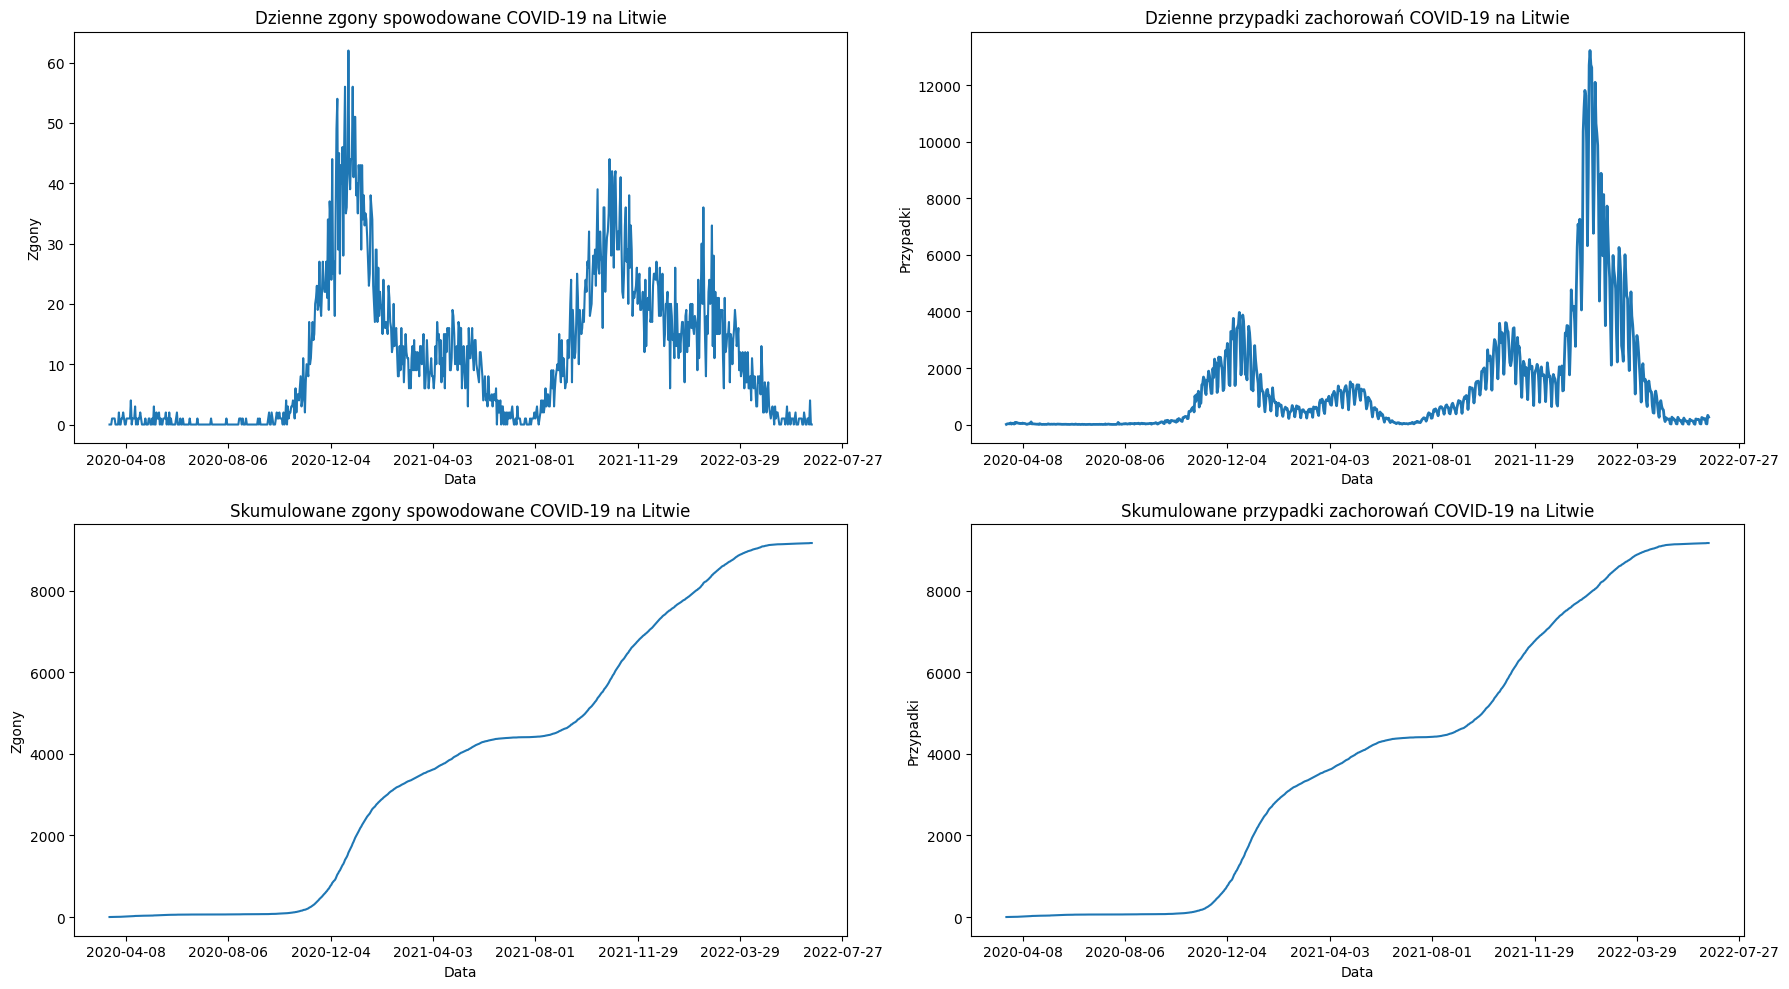

In [ ]:
from matplotlib.dates import MonthLocator
from matplotlib.ticker import MultipleLocator

fig, axs = plt.subplots(2, 2, figsize=(18, 10))

axs[0, 0].plot(data['date'], data['deaths'])
axs[0, 0].set_title('Dzienne zgony spowodowane COVID-19 na Litwie')
axs[0, 0].set_ylabel('Zgony')
axs[0, 0].set_xlabel('Data')
axs[0, 0].xaxis.set_major_locator(MultipleLocator(120))


axs[0, 1].plot(data['date'], data['confirmed'], linewidth=2)
axs[0, 1].set_title('Dzienne przypadki zachorowań COVID-19 na Litwie')
axs[0, 1].set_ylabel('Przypadki')
axs[0, 1].set_xlabel('Data')
axs[0, 1].xaxis.set_major_locator(MultipleLocator(120))


axs[1, 0].plot(data_cumulated['date'], data_cumulated['deaths'])
axs[1, 0].set_title('Skumulowane zgony spowodowane COVID-19 na Litwie')
axs[1, 0].set_ylabel('Zgony')
axs[1, 0].set_xlabel('Data')
axs[1, 0].xaxis.set_major_locator(MultipleLocator(120))

axs[1, 1].plot(data_cumulated['date'], data_cumulated['deaths'])
axs[1, 1].set_title('Skumulowane przypadki zachorowań COVID-19 na Litwie')
axs[1, 1].set_ylabel('Przypadki')
axs[1, 1].set_xlabel('Data')
axs[1, 1].xaxis.set_major_locator(MultipleLocator(120))


plt.tight_layout()
plt.show()

## Stworzenie modeli regresji liniowej

### Wybór zmiennych

In [ ]:
# DZIENNE
variable_set_deaths_1 = ['icu',  'gatherings_restrictions', 'transport_closing'] #wczesniej ['hosp', 'icu', 'vent']
variable_set_deaths_2 = ['transport_closing', 'cancel_events', 'hosp'] #['facial_coverings', 'government_response_index']
variable_set_deaths_3 = ['government_response_index',  'confirmed',  'cancel_events']

columns_model_deaths = [variable_set_deaths_1, variable_set_deaths_2,
                        variable_set_deaths_3]

variable_set_cases_1 = ['recovered', 'tests', 'testing_policy']
variable_set_cases_2 = ['hosp', 'school_closing', 'information_campaigns'] #wczesniej ['hosp', 'icu', 'vent']
variable_set_cases_3 = ['testing_policy', 'facial_coverings', 'vaccination_policy', 'tests']
columns_model_cases = [variable_set_cases_1, variable_set_cases_2, variable_set_cases_3]


# SKUMULOWANE
# variable_set_deaths_1 = ['information_campaigns', 'stringency_index', 'transport_closing']
# variable_set_deaths_2 = ['school_closing', 'hosp', 'facial_coverings']
# variable_set_deaths_3 = ['vaccination_policy', 'transport_closing', 'elderly_people_protection']
# variable_set_deaths_4 = ['government_response_index',  'school_closing',  'cancel_events']

# columns_model_deaths = [variable_set_deaths_1, variable_set_deaths_2,
#                         variable_set_deaths_3, variable_set_deaths_4]

# variable_set_cases_1 = ['elderly_people_protection', 'stringency_index', 'transport_closing']
# variable_set_cases_2 = ['testing_policy', 'hosp', 'facial_coverings']
# variable_set_cases_3 = ['vaccination_policy', 'international_movement_restrictions', 'elderly_people_protection']
# variable_set_cases_4 = ['recovered', 'tests', 'workplace_closing']
# columns_model_cases = [variable_set_cases_1, variable_set_cases_2, variable_set_cases_3, variable_set_cases_4]

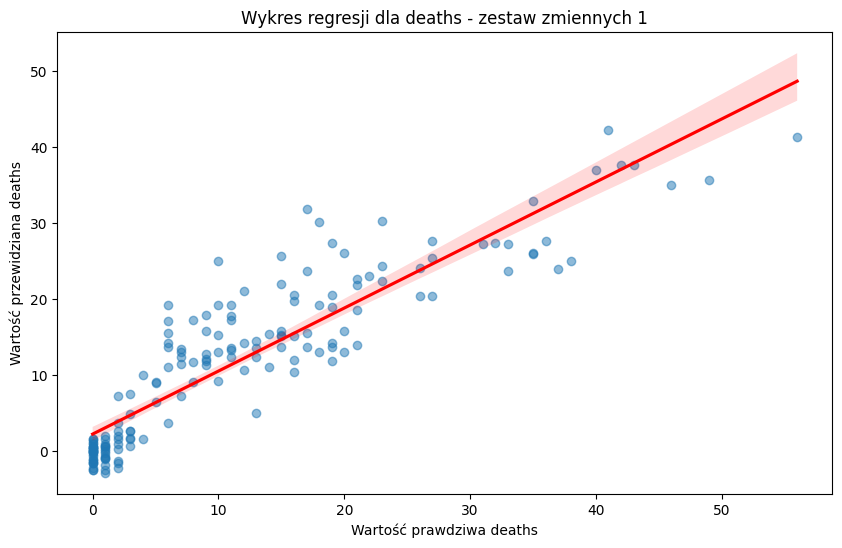

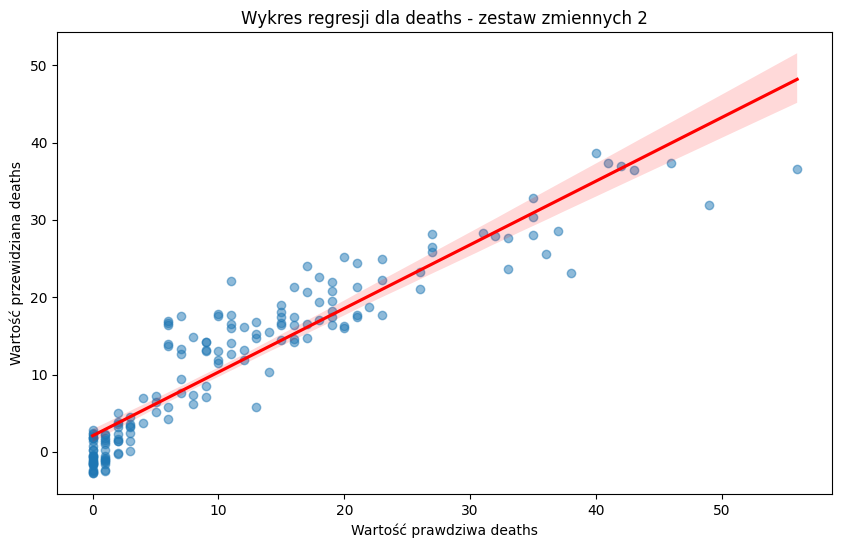

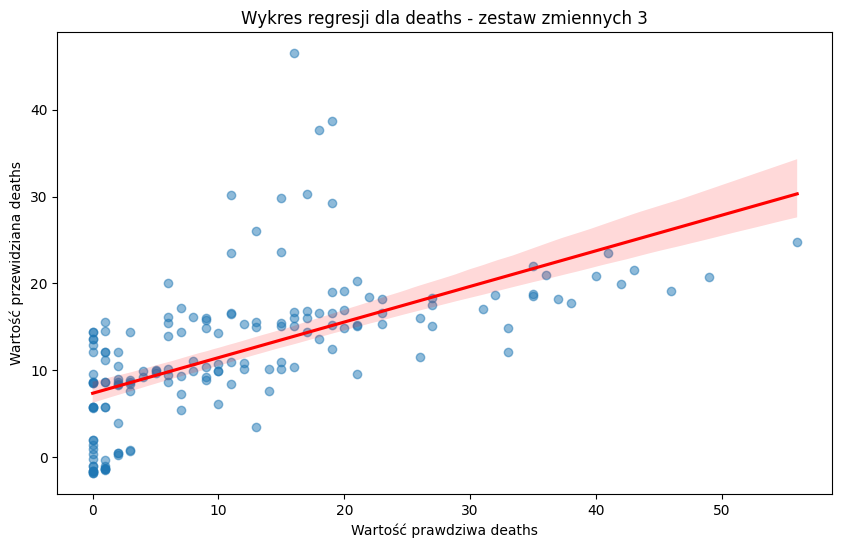

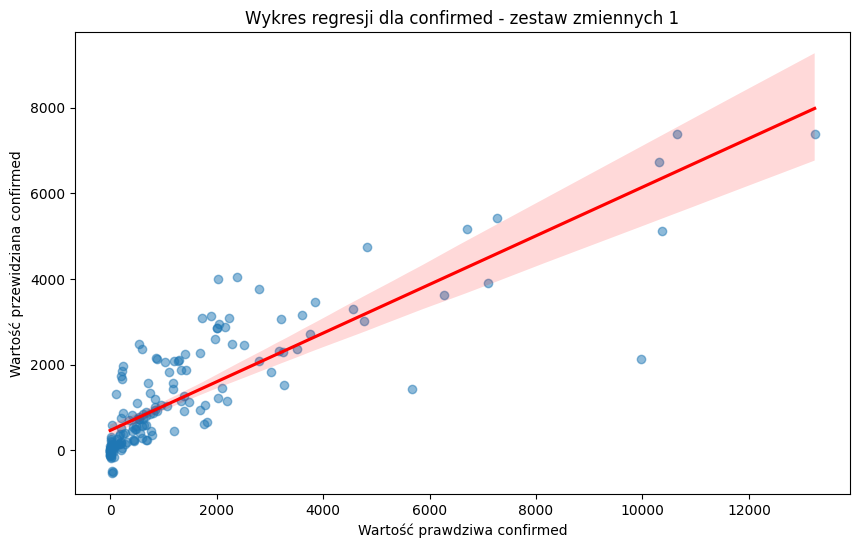

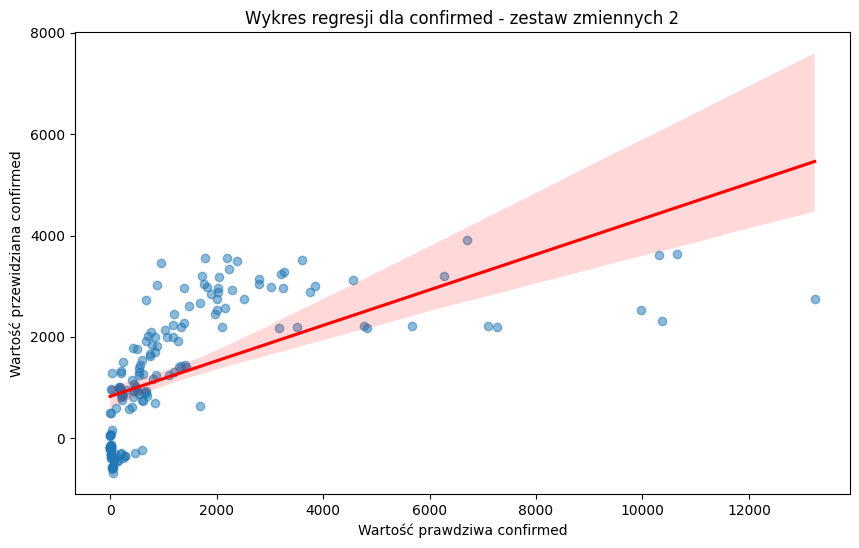

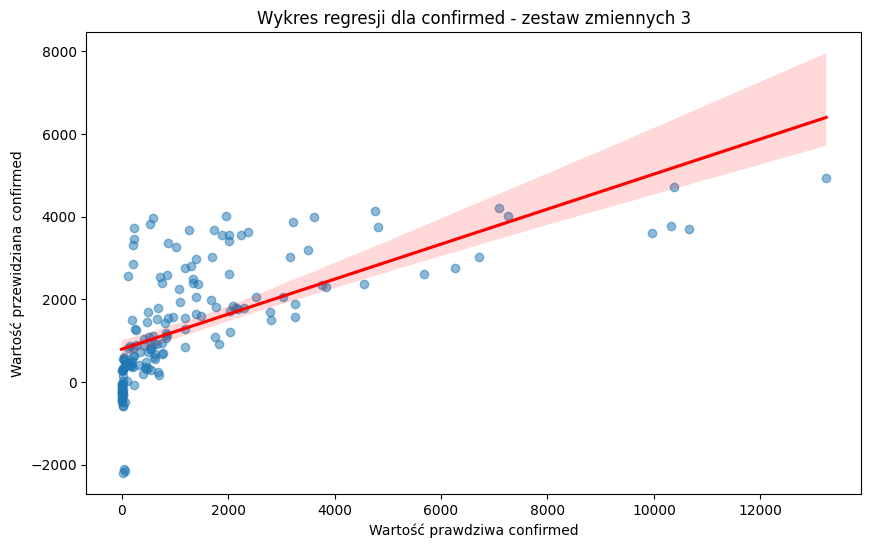

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


index = pd.MultiIndex.from_product(
    [['deaths', 'confirmed'], ['MSE', 'MAE', 'R2']],
    names=['zmienna', 'metryka']
)
columns = [f'Zestaw zmiennych {i+1}' for i in range(max(len(columns_model_deaths), len(columns_model_cases)))]
results_table = pd.DataFrame(index=index, columns=columns)
y_pred_lrs = []

for i, (target, vars_for_model) in enumerate(zip(['deaths', 'confirmed'], [columns_model_deaths, columns_model_cases])):
    for j, independent_vars in enumerate(vars_for_model):
        X = data[independent_vars]
        y = data[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        lr = LinearRegression()
        lr.fit(X_train_scaled, y_train)

        y_pred_lr = lr.predict(X_test_scaled)
        y_pred_lrs.append(y_pred_lr)
        mse = mean_squared_error(y_test, y_pred_lr)
        mae = mean_absolute_error(y_test, y_pred_lr)
        r2 = r2_score(y_test, y_pred_lr)

        results_table.loc[(target, 'MSE'), f'Zestaw zmiennych {j+1}'] = mse
        results_table.loc[(target, 'MAE'), f'Zestaw zmiennych {j+1}'] = mae
        results_table.loc[(target, 'R2'), f'Zestaw zmiennych {j+1}'] = r2

        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred_lr, alpha=0.5)
        sns.regplot(x=y_test, y=y_pred_lr, scatter=False, color='red')
        plt.xlabel(f'Wartość prawdziwa {target}')
        plt.ylabel(f'Wartość przewidziana {target}')
        plt.title(f'Wykres regresji dla {target} - zestaw zmiennych {j+1}')
        plt.show()



In [ ]:
results_table

Zestaw zmiennych 1 Zestaw zmiennych 2 Zestaw zmiennych 3
zmienna   metryka                                                         
deaths    MSE               26.53245          19.842297          94.184595
          MAE               3.690031           3.123032           7.191662
          R2                 0.81888            0.86455           0.357064
confirmed MSE         1553836.626904     3102095.471821     2852477.741973
          MAE             663.375786         986.051313        1024.481605
          R2                0.685286           0.371701           0.422259

In [ ]:
# znalezienie najlepszych zestawów zmiennych wg R2
r2_values = results_table.xs('R2', level='metryka').astype(float)
min_r2_indices = r2_values.idxmax(axis="columns")
best_r2_set_deaths_ix = int(min_r2_indices['deaths'][-1])
best_r2_set_cases_ix = int(min_r2_indices['confirmed'][-1])
best_r2_set_deaths = next(columns_model_deaths[i] for i in range(len(columns_model_deaths)) if i==best_r2_set_deaths_ix-1)
best_r2_set_cases = next(columns_model_cases[i] for i in range(len(columns_model_cases)) if i==best_r2_set_cases_ix-1)

print(f'Bazując na R2 najlepszym zbiorem zmiennych do predykcji liczby zgonów jest {best_r2_set_deaths}\n\n\
Bazując na R2 najlepszym zbiorem zmiennych do predykcji liczby przypadków (confirmed) jest  {best_r2_set_cases}')

Bazując na R2 najlepszym zbiorem zmiennych do predykcji liczby zgonów jest ['transport_closing', 'cancel_events', 'hosp']

Bazując na R2 najlepszym zbiorem zmiennych do predykcji liczby przypadków (confirmed) jest  ['recovered', 'tests', 'testing_policy']


## Sprawdzanie założeń regresji liniowej dla danych

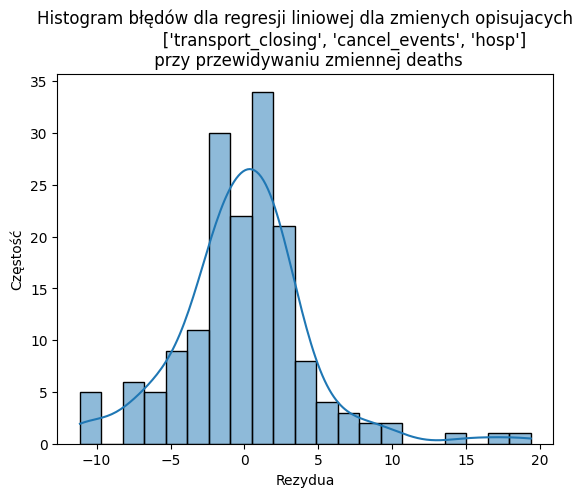

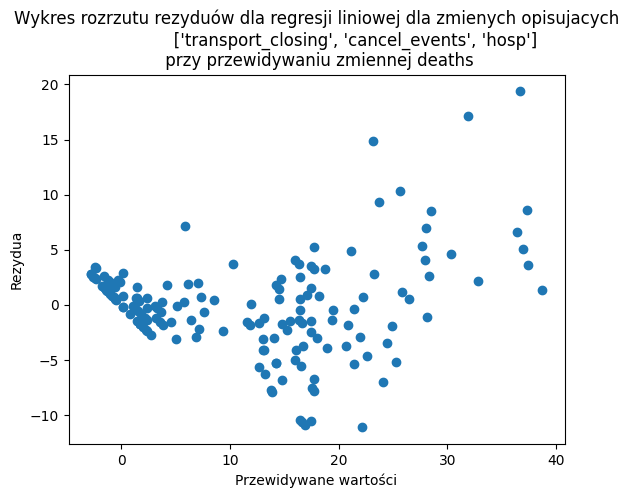

Test Shapiro-Wilka dla regresji liniowej dla zmienych opisujacych
               ['transport_closing', 'cancel_events', 'hosp']
 przy przewidywaniu zmiennej deaths
Statystyka testowa: 0.9321727752685547
Wartość p: 4.957880150868732e-07
Test Breuscha-Pagana dla regresji liniowej dla zmienych opisujacych
               ['transport_closing', 'cancel_events', 'hosp']
 przy przewidywaniu zmiennej deaths
Wartość p: 8.302996869509213e-07


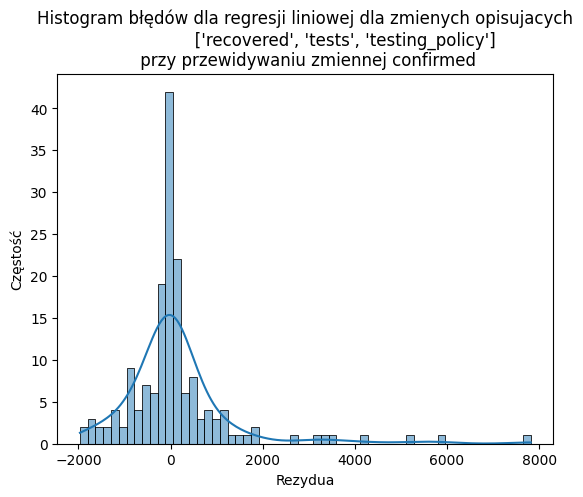

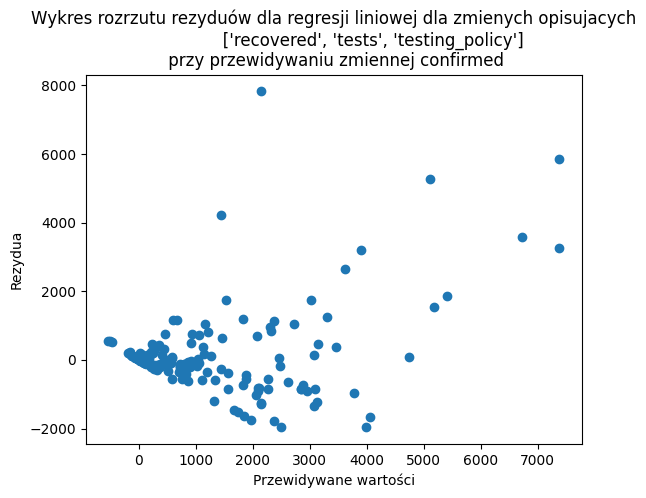

Test Shapiro-Wilka dla regresji liniowej dla zmienych opisujacych
               ['recovered', 'tests', 'testing_policy']
 przy przewidywaniu zmiennej confirmed
Statystyka testowa: 0.7254358530044556
Wartość p: 3.2675682956785764e-16
Test Breuscha-Pagana dla regresji liniowej dla zmienych opisujacych
               ['recovered', 'tests', 'testing_policy']
 przy przewidywaniu zmiennej confirmed
Wartość p: 6.134665967670428e-07


In [ ]:
from scipy import stats
import statsmodels.api as sm


for i, vars in enumerate([best_r2_set_deaths, best_r2_set_cases]):
    X = data[vars]
    y = data['deaths'] if i==0 else data['confirmed']
    predicted = 'deaths' if i==0 else 'confirmed'
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    y_pred_lr = y_pred_lrs[best_r2_set_deaths_ix-1] if i == 0 else y_pred_lrs[best_r2_set_cases_ix+3-1]

    # Rozkład błędów
    residuals_lr = y_test - y_pred_lr
    sns.histplot(residuals_lr, kde=True)
    plt.xlabel("Rezydua")
    plt.ylabel("Częstość")
    plt.title(f"Histogram błędów dla regresji liniowej dla zmienych opisujacych\n \
              {vars}\n przy przewidywaniu zmiennej {predicted}")
    plt.show()


    # Homoskedastyczność
    plt.scatter(y_pred_lr, residuals_lr)
    plt.xlabel("Przewidywane wartości")
    plt.ylabel("Rezydua")
    plt.title(f"Wykres rozrzutu rezyduów dla regresji liniowej dla zmienych opisujacych\n \
              {vars}\n przy przewidywaniu zmiennej {predicted}")
    plt.show()

   # Test Shapiro-Wilka dla normalności
    shapiro_stat, shapiro_p = stats.shapiro(residuals_lr)
    print(f"Test Shapiro-Wilka dla regresji liniowej dla zmienych opisujacych\n \
              {vars}\n przy przewidywaniu zmiennej {predicted}")
    print("Statystyka testowa:", shapiro_stat)
    print("Wartość p:", shapiro_p)

    # Test Breuscha-Pagana dla homoskedastyczności
    X_const = sm.add_constant(X_test)  # Dodanie kolumny stałej
    _, bp_p, _, _ = sm.stats.diagnostic.het_breuschpagan(residuals_lr, X_const)
    print(f"Test Breuscha-Pagana dla regresji liniowej dla zmienych opisujacych\n \
              {vars}\n przy przewidywaniu zmiennej {predicted}")
    print("Wartość p:", bp_p,)

## Sprawdzanie współliniowości zmiennych

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Zmienna'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

#for vars_for_model in [columns_model_deaths, columns_model_cases]:
for group in [best_r2_set_deaths, best_r2_set_cases]:
    vif_df = calculate_vif(data[group])
    print(f"VIF dla grupy {group}:")
    print(vif_df, end='\n\n\n')


VIF dla grupy ['transport_closing', 'cancel_events', 'hosp']:
             Zmienna       VIF
0  transport_closing  1.556961
1      cancel_events  3.804627
2               hosp  3.129406


VIF dla grupy ['recovered', 'tests', 'testing_policy']:
          Zmienna       VIF
0       recovered  1.771152
1           tests  3.957307
2  testing_policy  3.274322




# Regresja wielomianowa vs SVR vs Drzewa regresyjne vs Las losowy

## Sprawdzenie współliniowości zmiennych

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib.dates import MonthLocator, DateFormatter

X_deaths = data[best_r2_set_deaths]
y_deaths = data['deaths']
X_cases = data[best_r2_set_cases]
y_cases = data['confirmed']

X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths, \
dates_train_deaths, dates_test_deaths = train_test_split(
                                                    X_deaths, y_deaths, data['date'],
                                                    test_size=0.2, random_state=42)
X_train_cases, X_test_cases, y_train_cases, y_test_cases, dates_train_cases, dates_test_cases = train_test_split(
                                                    X_cases, y_cases, data['date'],
                                                    test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test, predicted_var, dates_train, dates_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    metrics = {
        'Model': model.__class__.__name__,
        'Predicted Variable': predicted_var,
        'Train MSE': mean_squared_error(y_train, y_pred_train),
        'Test MSE': mean_squared_error(y_test, y_pred_test),
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test)
    }

    plt.figure(figsize=(21, 6))

    plt.subplot(1, 3, 1)
    plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
    plt.xlabel('Dane')
    plt.ylabel('Przewidziane')
    plt.title(f'{model.__class__.__name__} do przewidywania {predicted_var} - dane testowe')

    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Dane')
    plt.ylabel('Przewidziane')
    plt.title(f'{model.__class__.__name__} do przewidywania {predicted_var} - dane treningowe')

    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test - y_pred_test, color='red', alpha=0.5)
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linestyles='dashed')
    plt.xlabel('Przewidziane')
    plt.ylabel('Rezydua')
    plt.title(f'{model.__class__.__name__} do przewidywania {predicted_var} - Residuals')

    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(2, 1, figsize=(16, 10))

    axs[0].scatter(dates_train, y_train, label='Prawdziwe dane treningowe')
    axs[0].scatter(dates_train, y_pred_train, label='Przewidziane dane treningowe', linestyle='--')
    axs[0].set_title(f'{model.__class__.__name__} - {predicted_var} dane treningowe')
    axs[0].xaxis.set_major_locator(MultipleLocator(120))
    # axs[0].xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    ylabel = 'Zgony' if predicted_var=='deaths' else 'Przypadki'
    axs[0].set_xlabel("Data")
    axs[0].set_ylabel(ylabel)
    axs[0].legend()

    axs[1].scatter(dates_test, y_test, label='Prawdziwe dane testowe')
    axs[1].scatter(dates_test, y_pred_test, label='Przewidziane dane testowe', linestyle='--')
    axs[1].set_title(f'{model.__class__.__name__} - {predicted_var} dane testowe')
    axs[1].xaxis.set_major_locator(MultipleLocator(120))
    axs[1].set_xlabel("Data")
    axs[1].set_ylabel(ylabel)
    # axs[1].xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    return metrics

## Regresja wielomianowa

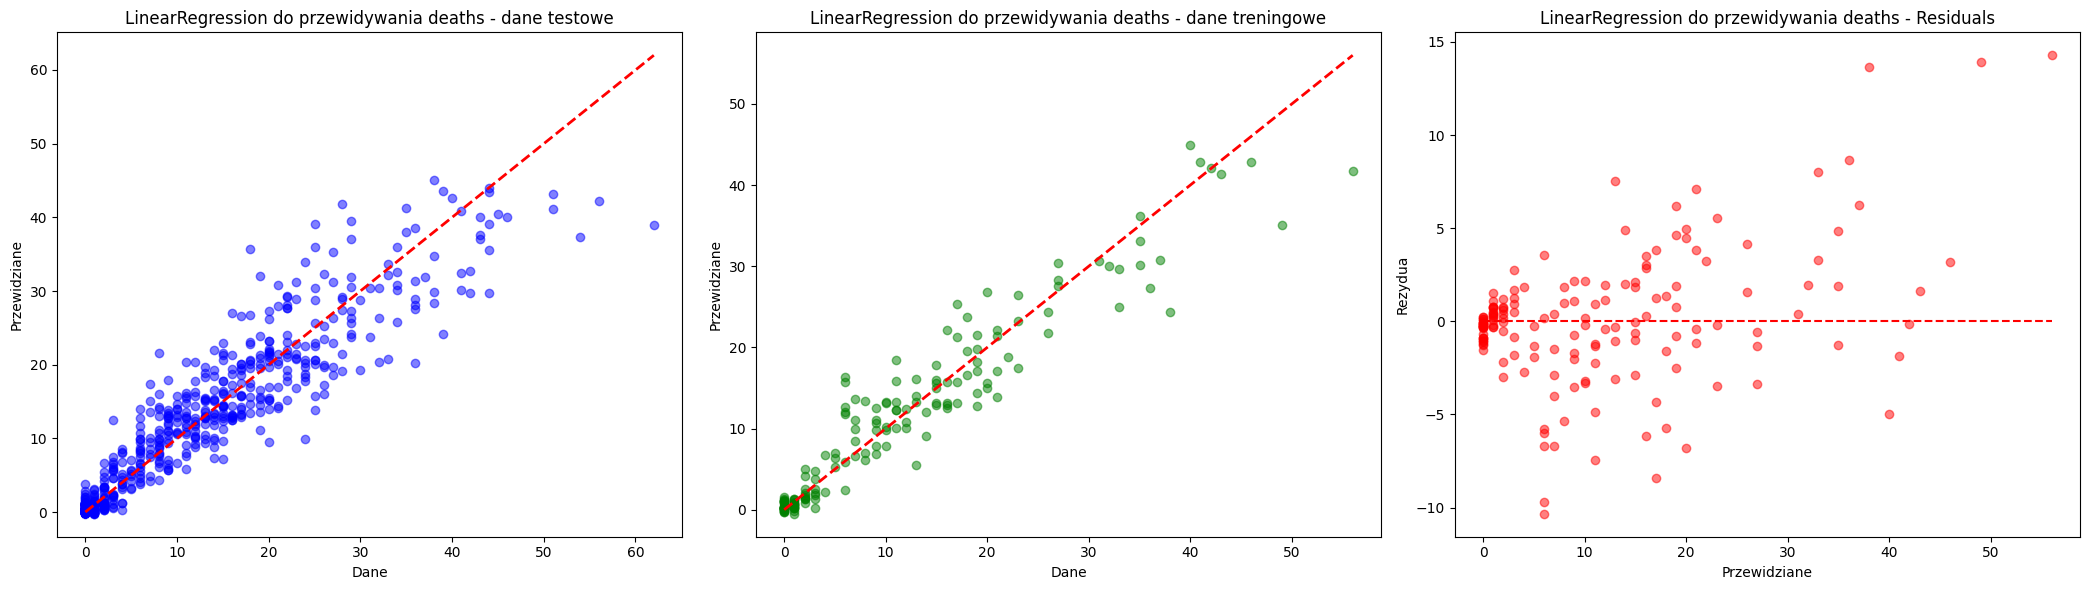

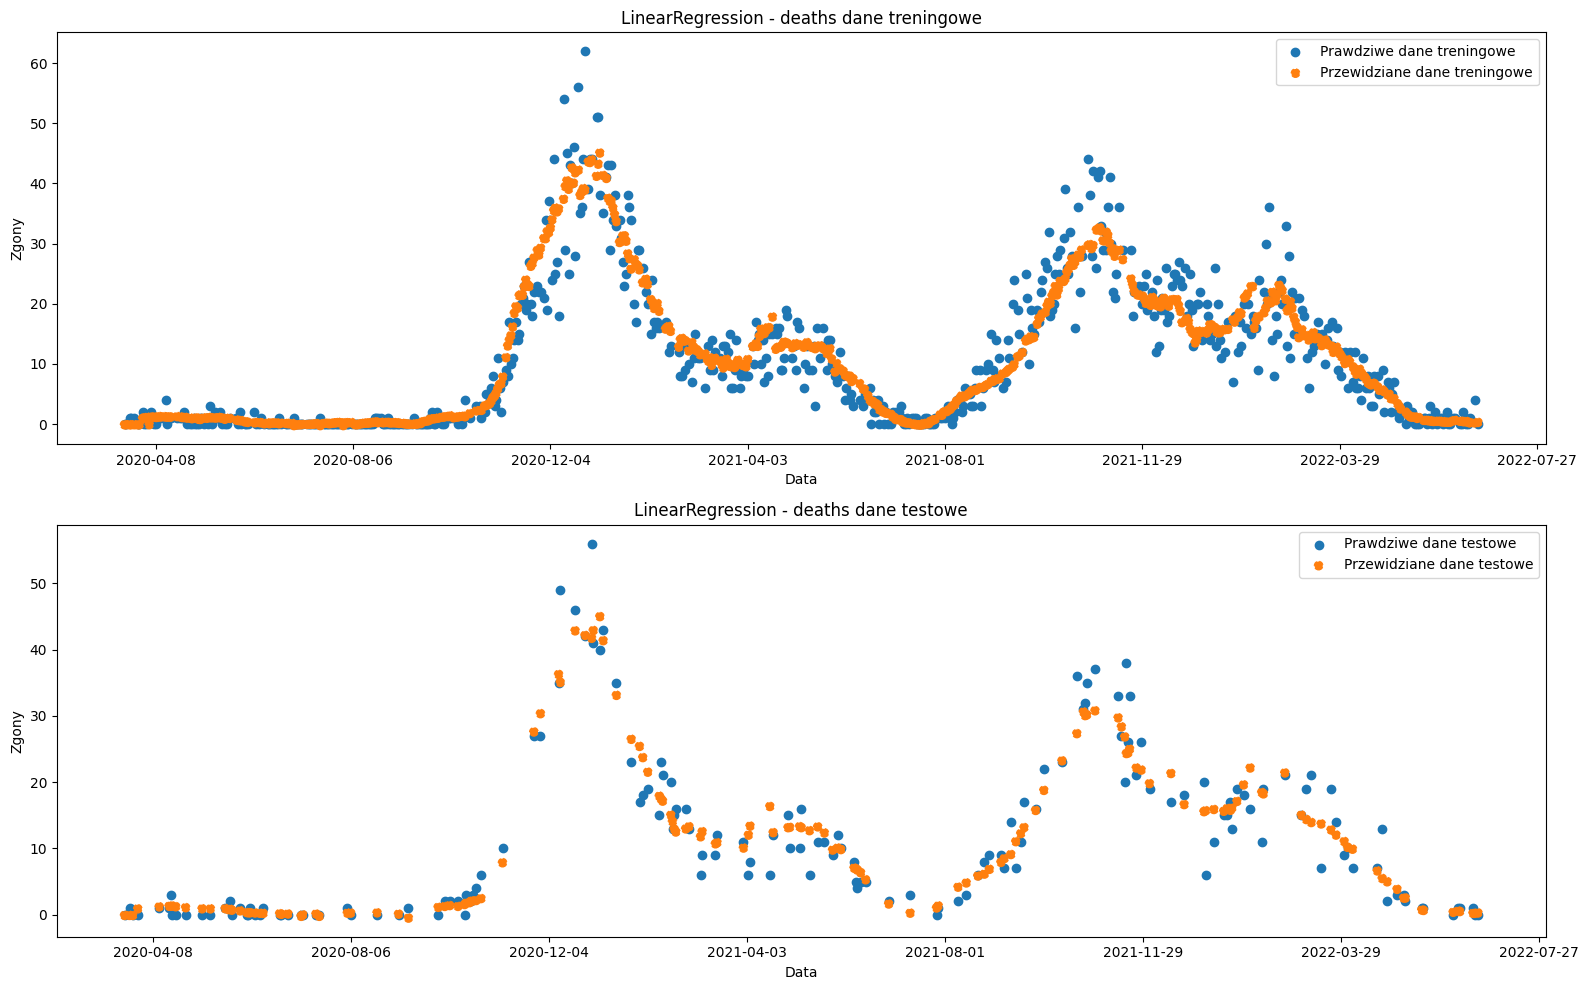

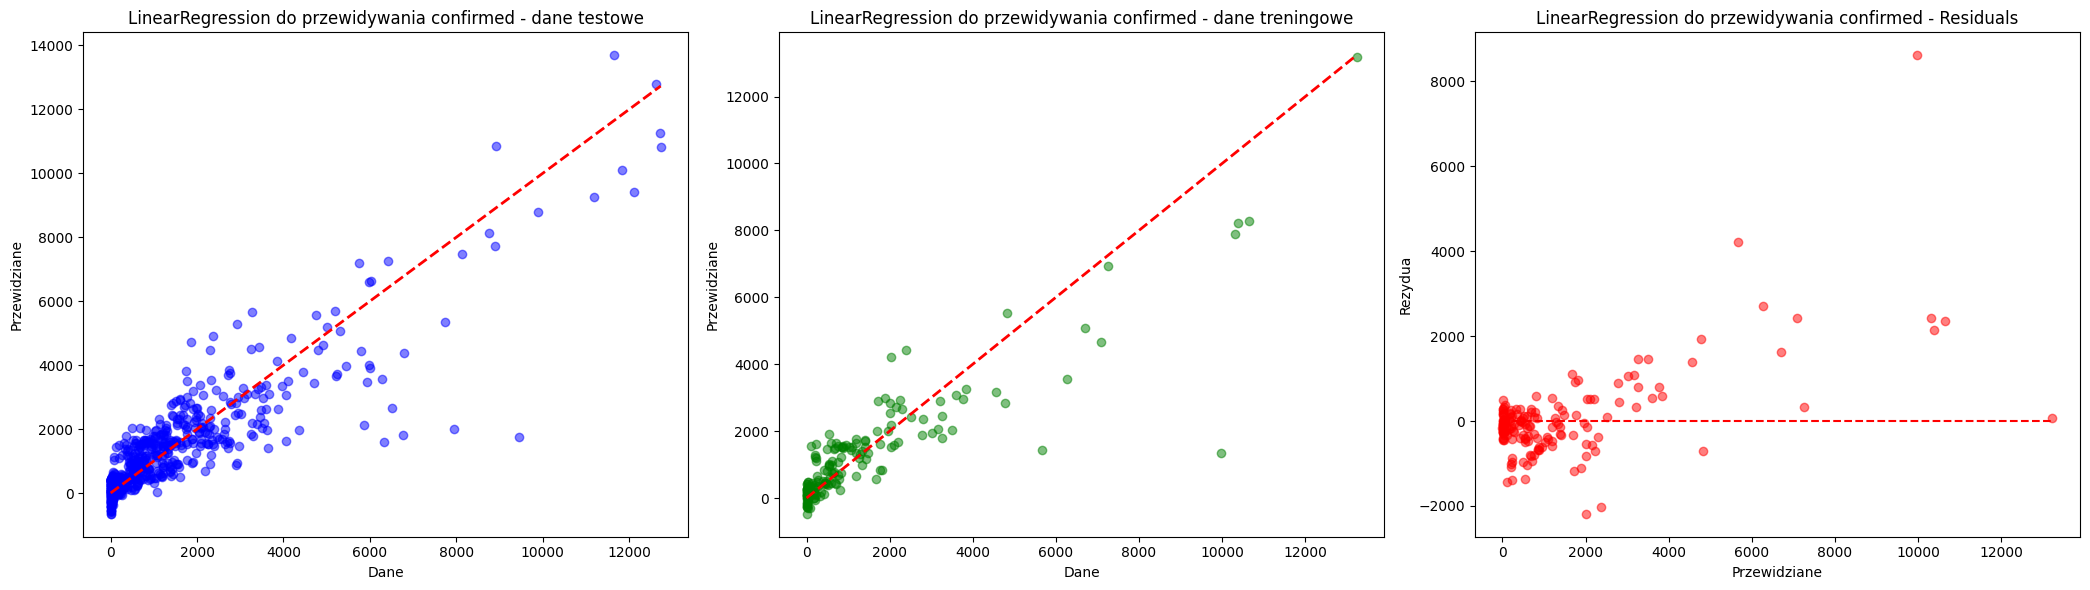

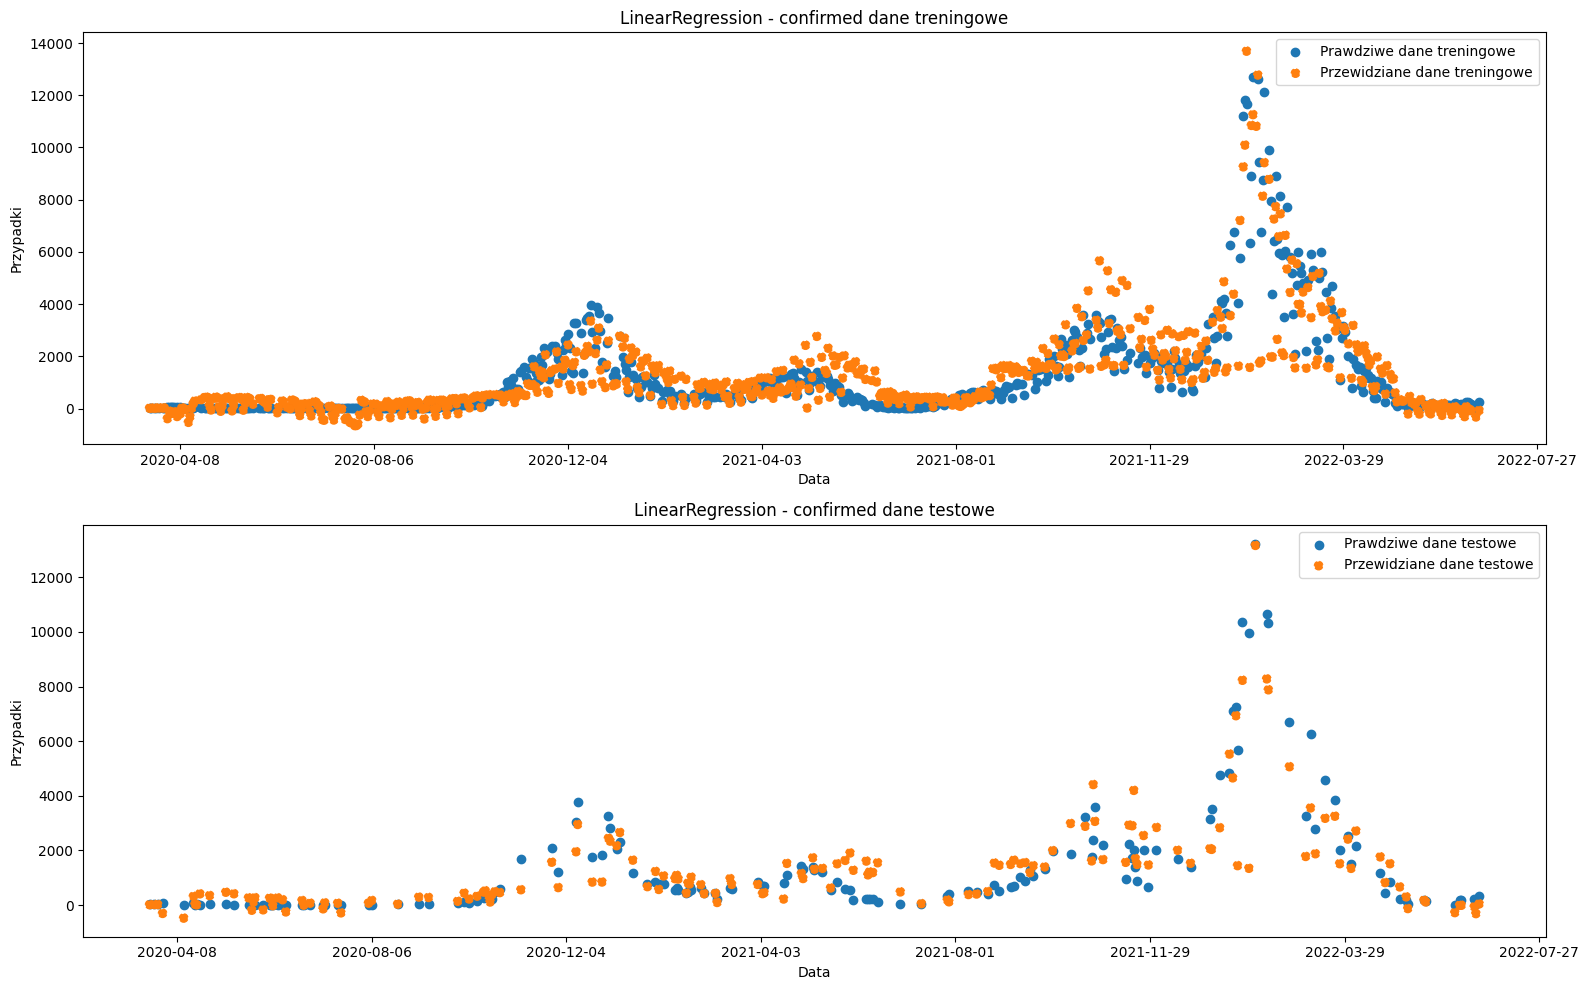

In [ ]:
poly = PolynomialFeatures(degree=3)

X_train_deaths_standardized = poly.fit_transform(X_train_deaths)
X_test_deaths_standardized = poly.transform(X_test_deaths)
X_train_cases_standardized = poly.fit_transform(X_train_cases)
X_test_cases_standardized = poly.transform(X_test_cases)
# print(poly.get_feature_names_out())
poly_reg = LinearRegression()
poly_metrics_deaths= evaluate_model(poly_reg, X_train_deaths_standardized,
                              X_test_deaths_standardized, y_train_deaths, y_test_deaths, 'deaths',
                                                            dates_train_deaths, dates_test_deaths)
poly_metrics_cases= evaluate_model(poly_reg, X_train_cases_standardized,
                              X_test_cases_standardized, y_train_cases, y_test_cases, 'confirmed',
                                                          dates_train_cases, dates_test_cases)


## SVR

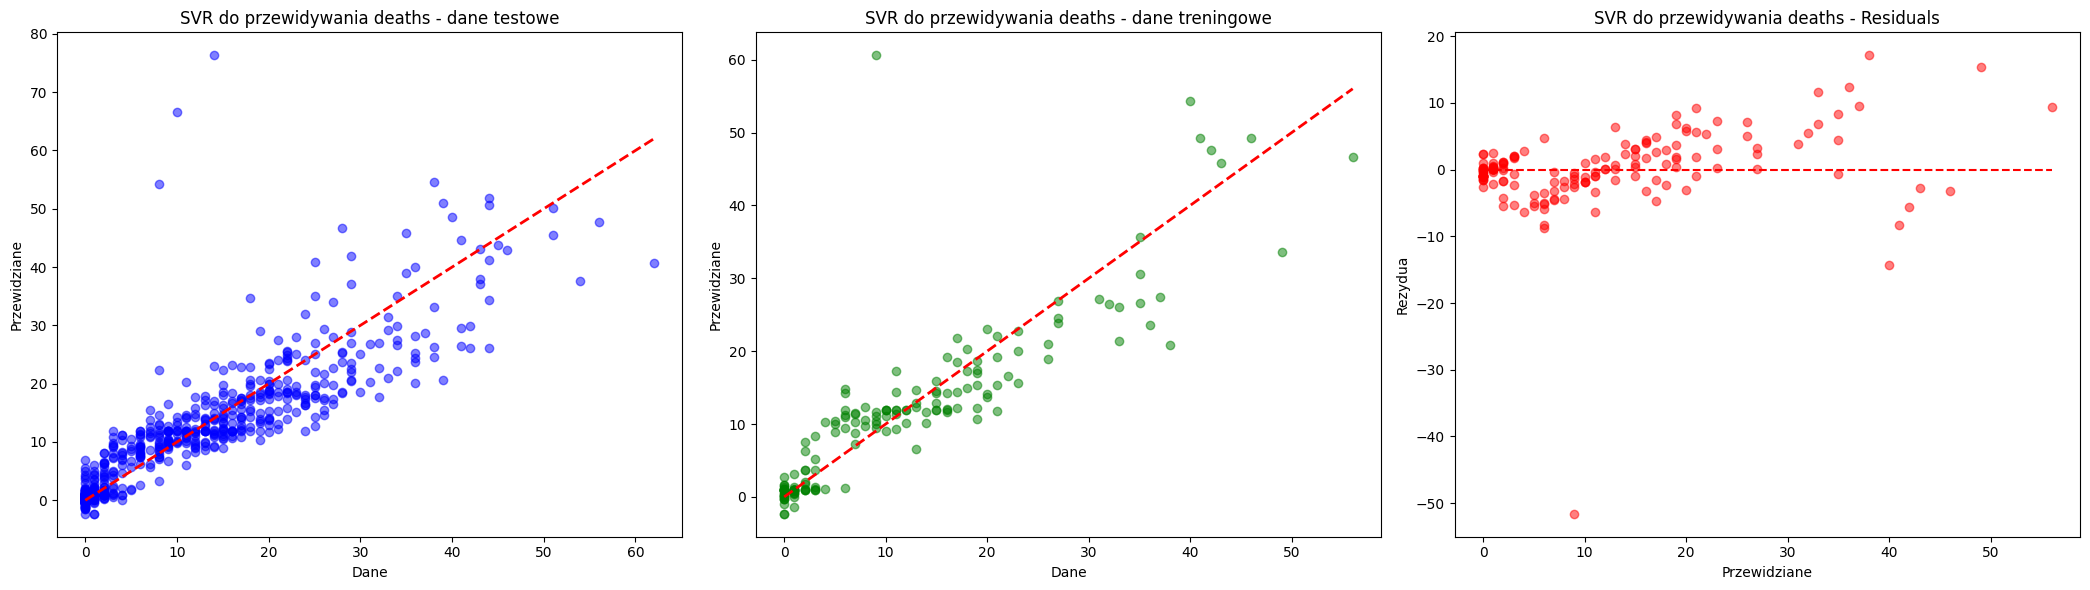

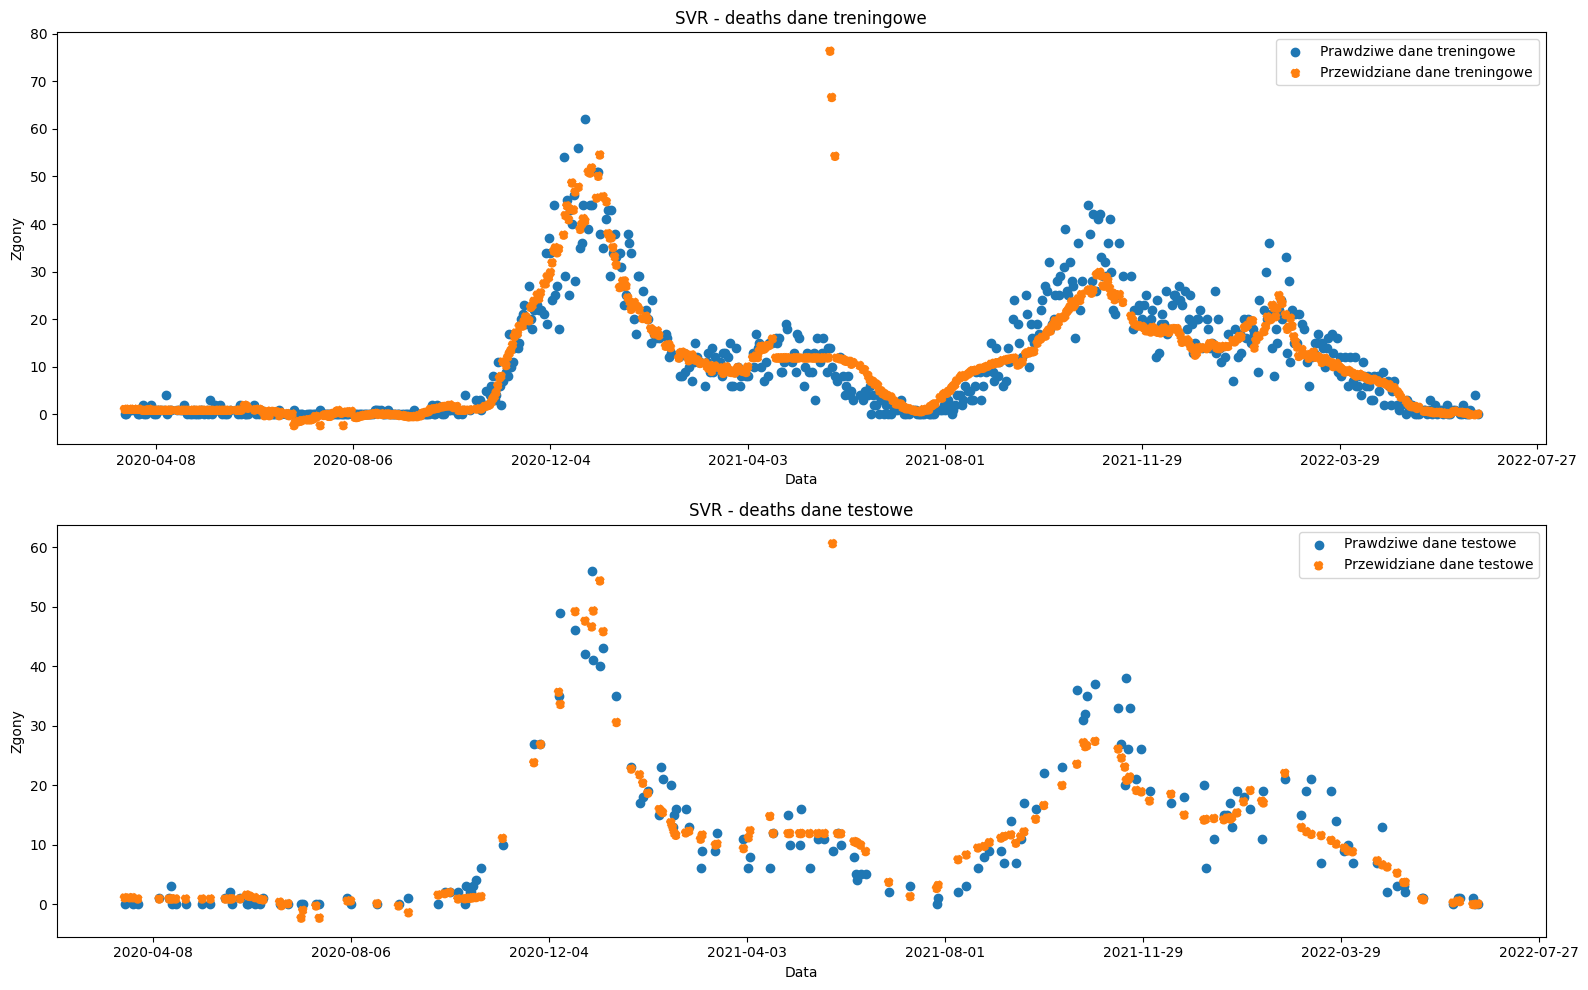

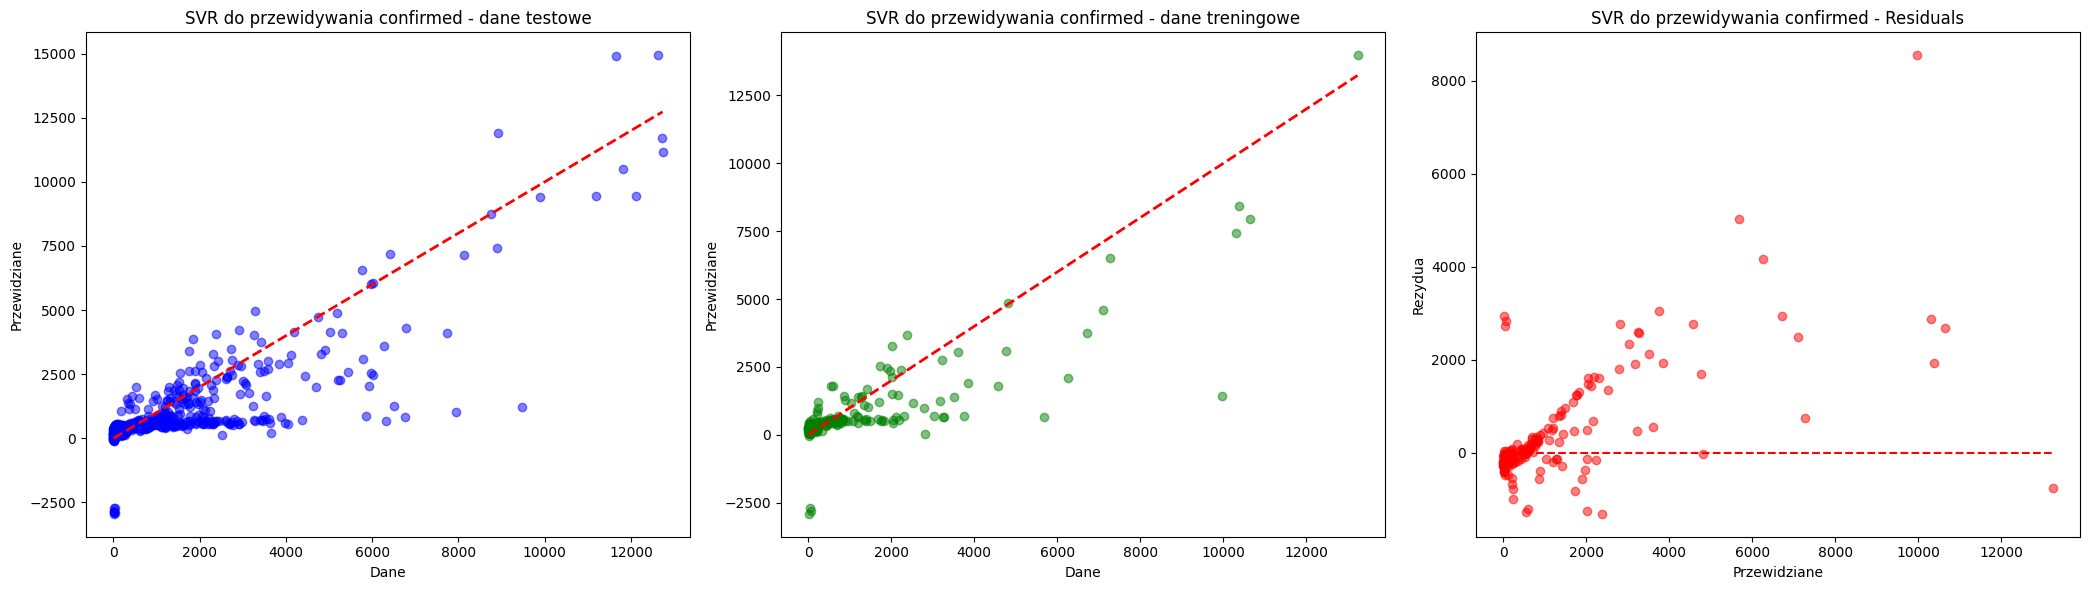

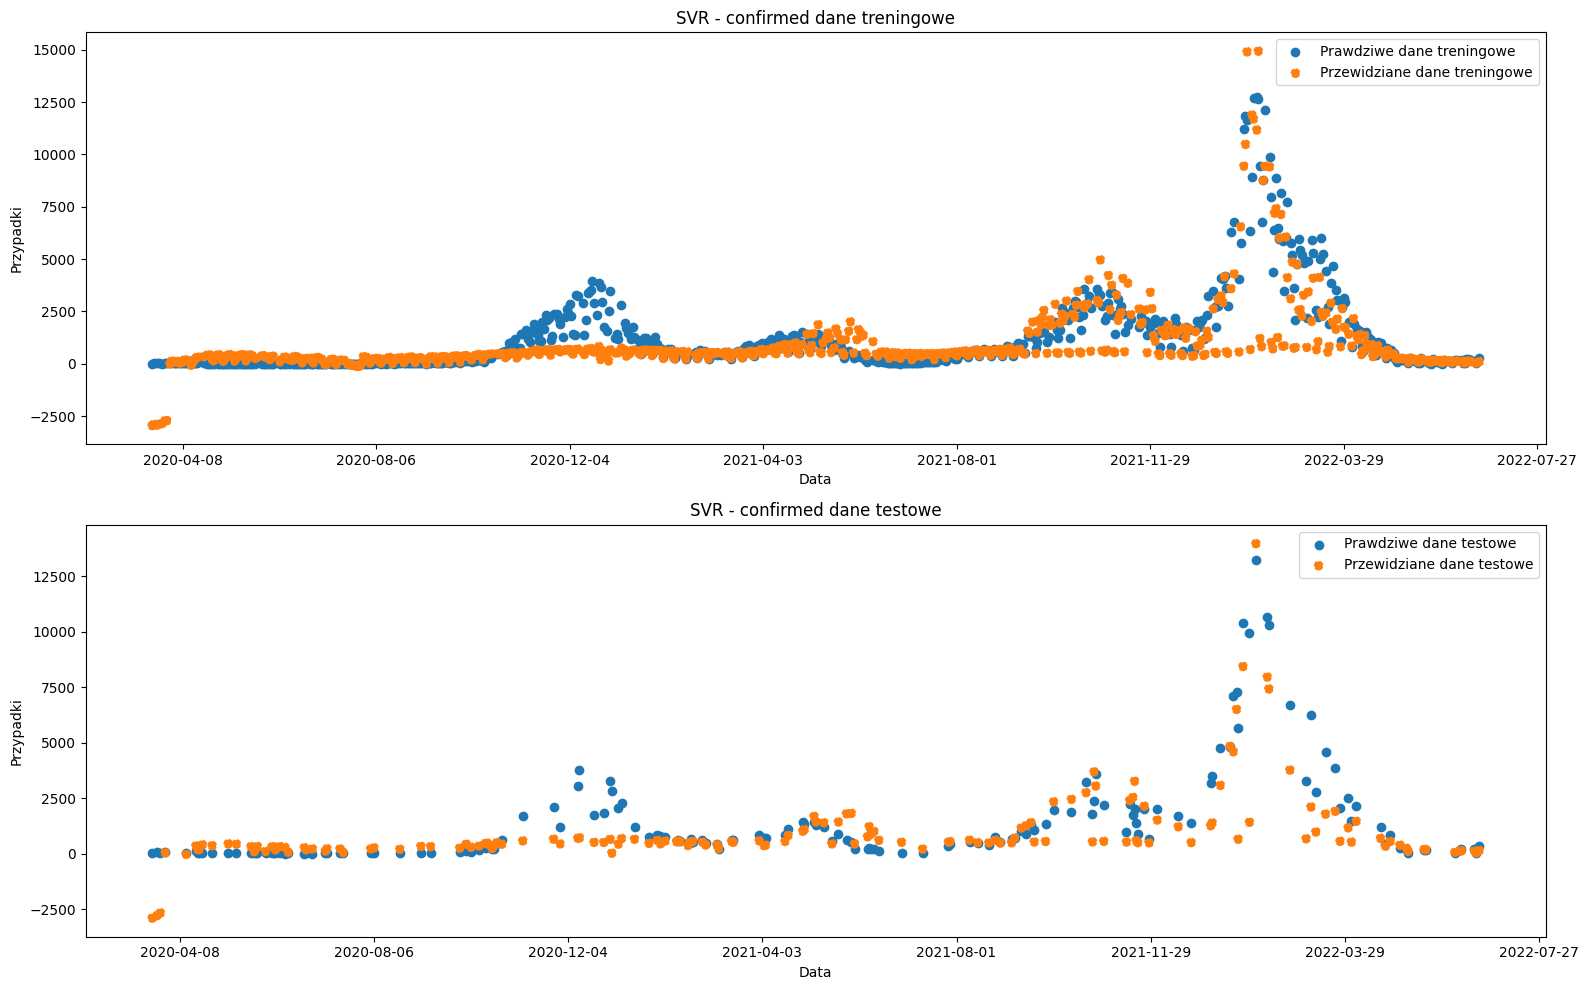

In [ ]:
scaler = StandardScaler()
X_train_deaths_standardized = scaler.fit_transform(X_train_deaths)
X_test_deaths_standardized = scaler.transform(X_test_deaths)
X_train_cases_standardized = scaler.fit_transform(X_train_cases)
X_test_cases_standardized = scaler.transform(X_test_cases)

svr = SVR(C=30, kernel='poly')
svr_metrics_deaths = evaluate_model(svr, X_train_deaths_standardized, X_test_deaths_standardized,
                             y_train_deaths, y_test_deaths, 'deaths', dates_train_deaths, dates_test_deaths)
svr_metrics_cases = evaluate_model(svr, X_train_cases_standardized, X_test_cases_standardized,
                             y_train_cases, y_test_cases, 'confirmed', dates_train_cases, dates_test_cases)

## Drzewo regresyjne

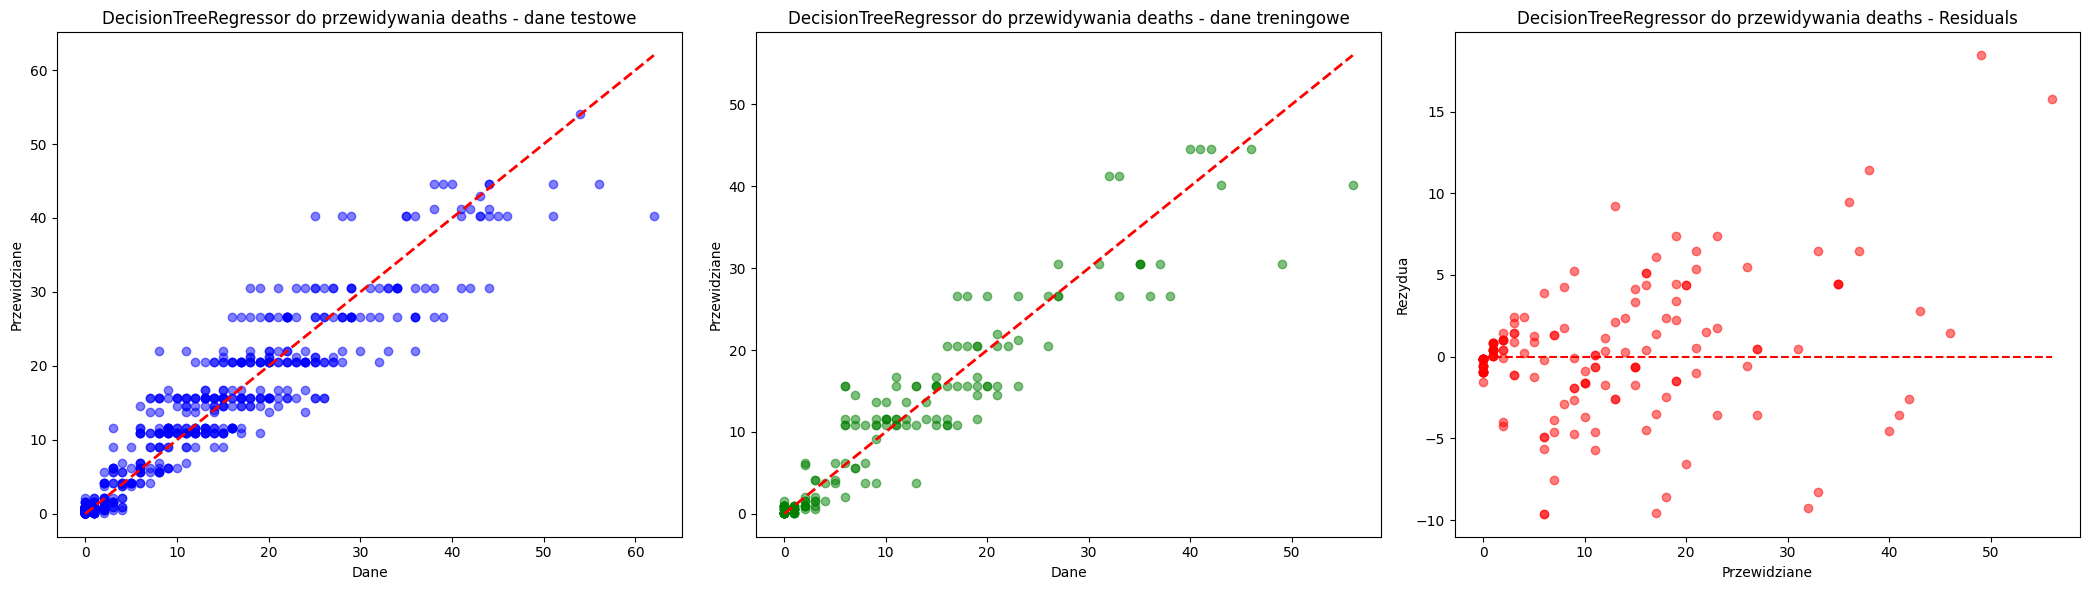

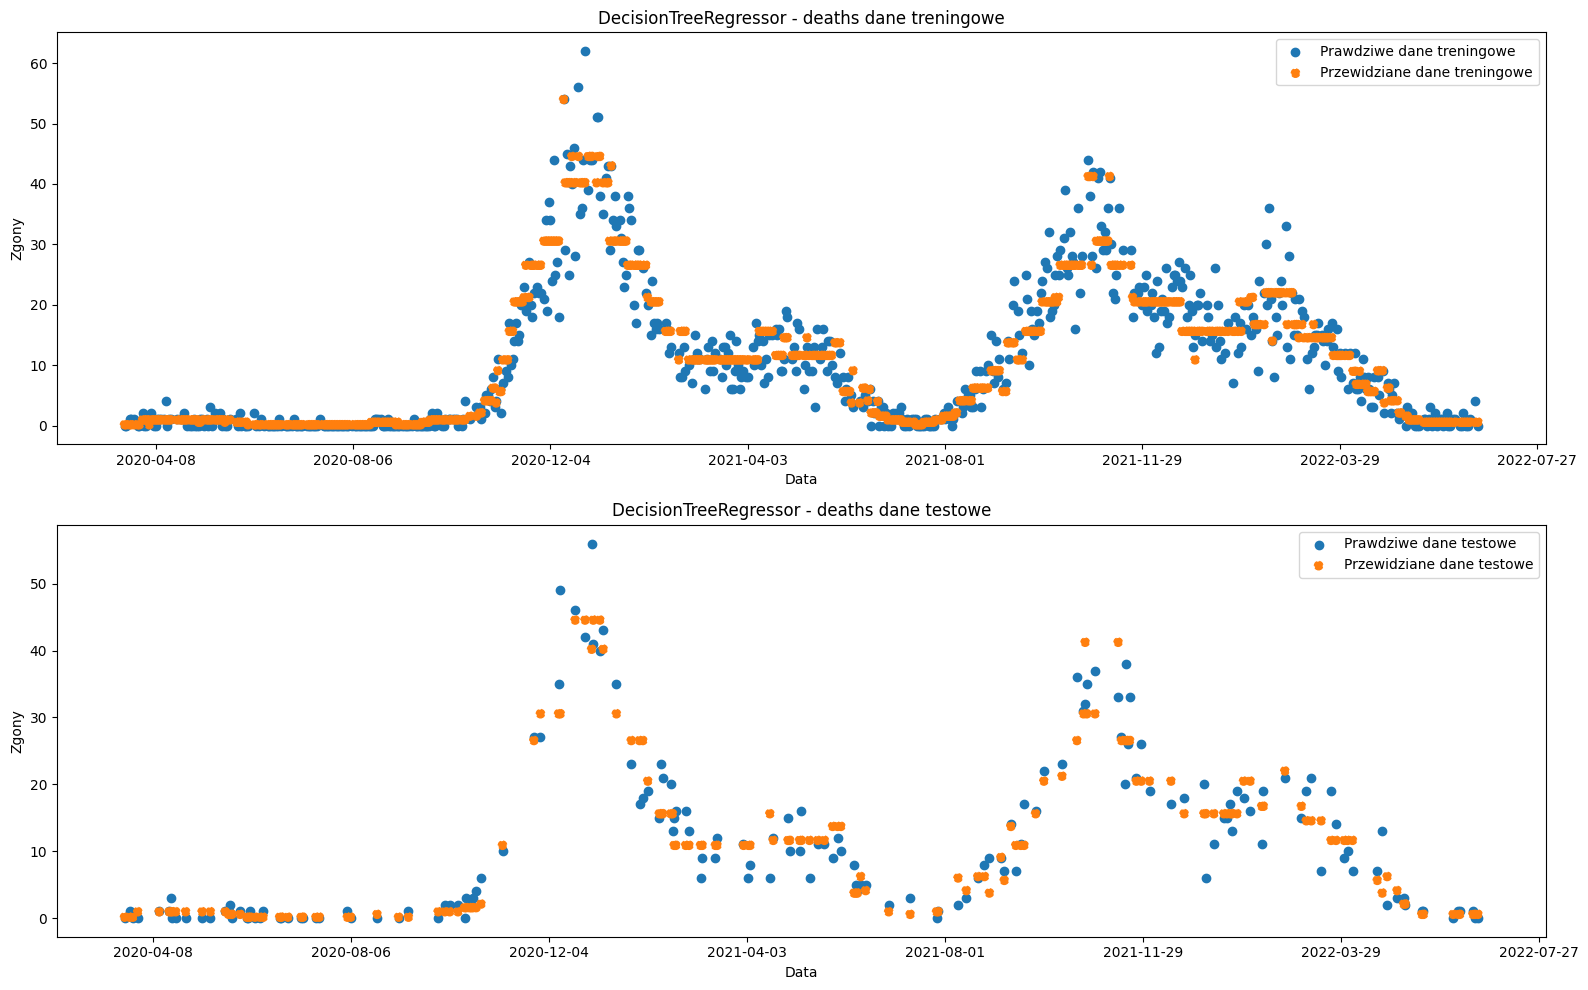

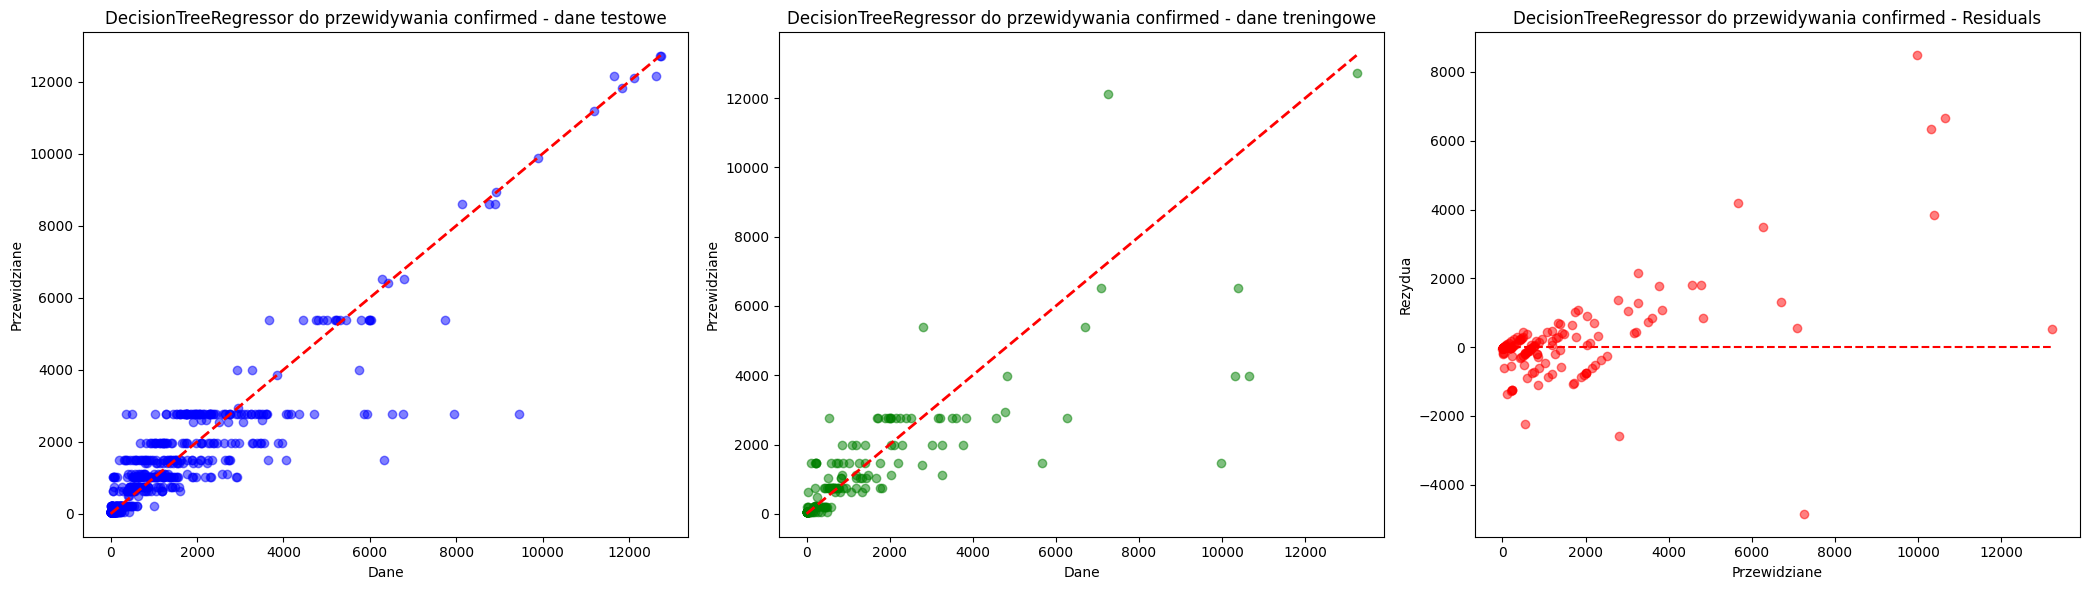

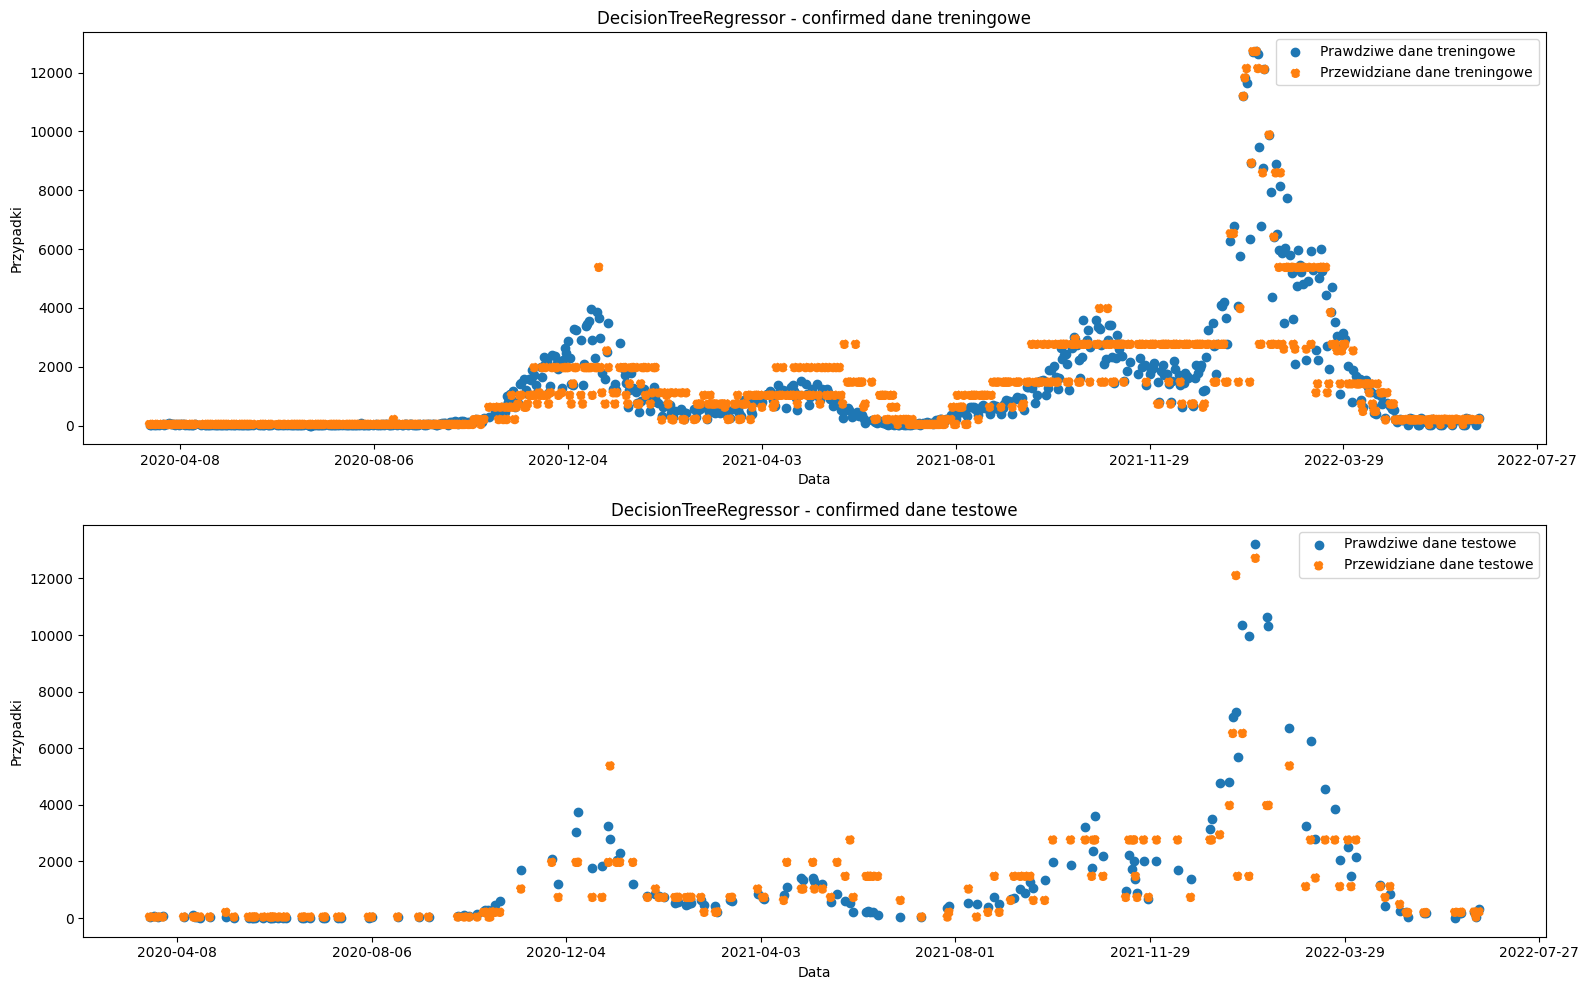

In [ ]:
tree = DecisionTreeRegressor(max_depth=5)
tree_metrics_deaths = evaluate_model(tree, X_train_deaths, X_test_deaths,
                                     y_train_deaths, y_test_deaths, 'deaths', dates_train_deaths, dates_test_deaths)
tree_metrics_cases= evaluate_model(tree, X_train_cases, X_test_cases,
                                    y_train_cases, y_test_cases, 'confirmed', dates_train_cases, dates_test_cases)

## Random Forest

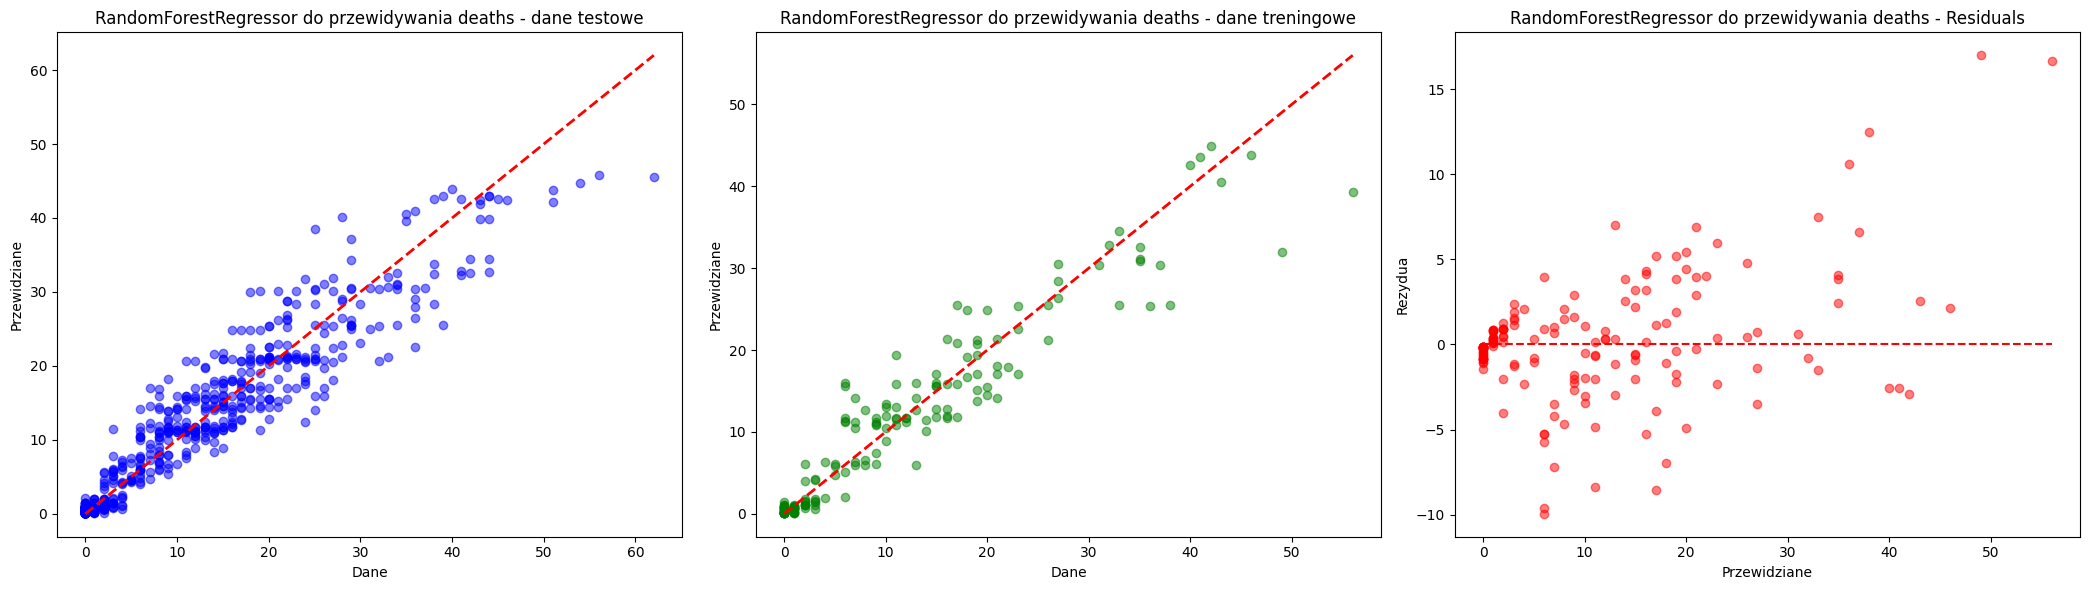

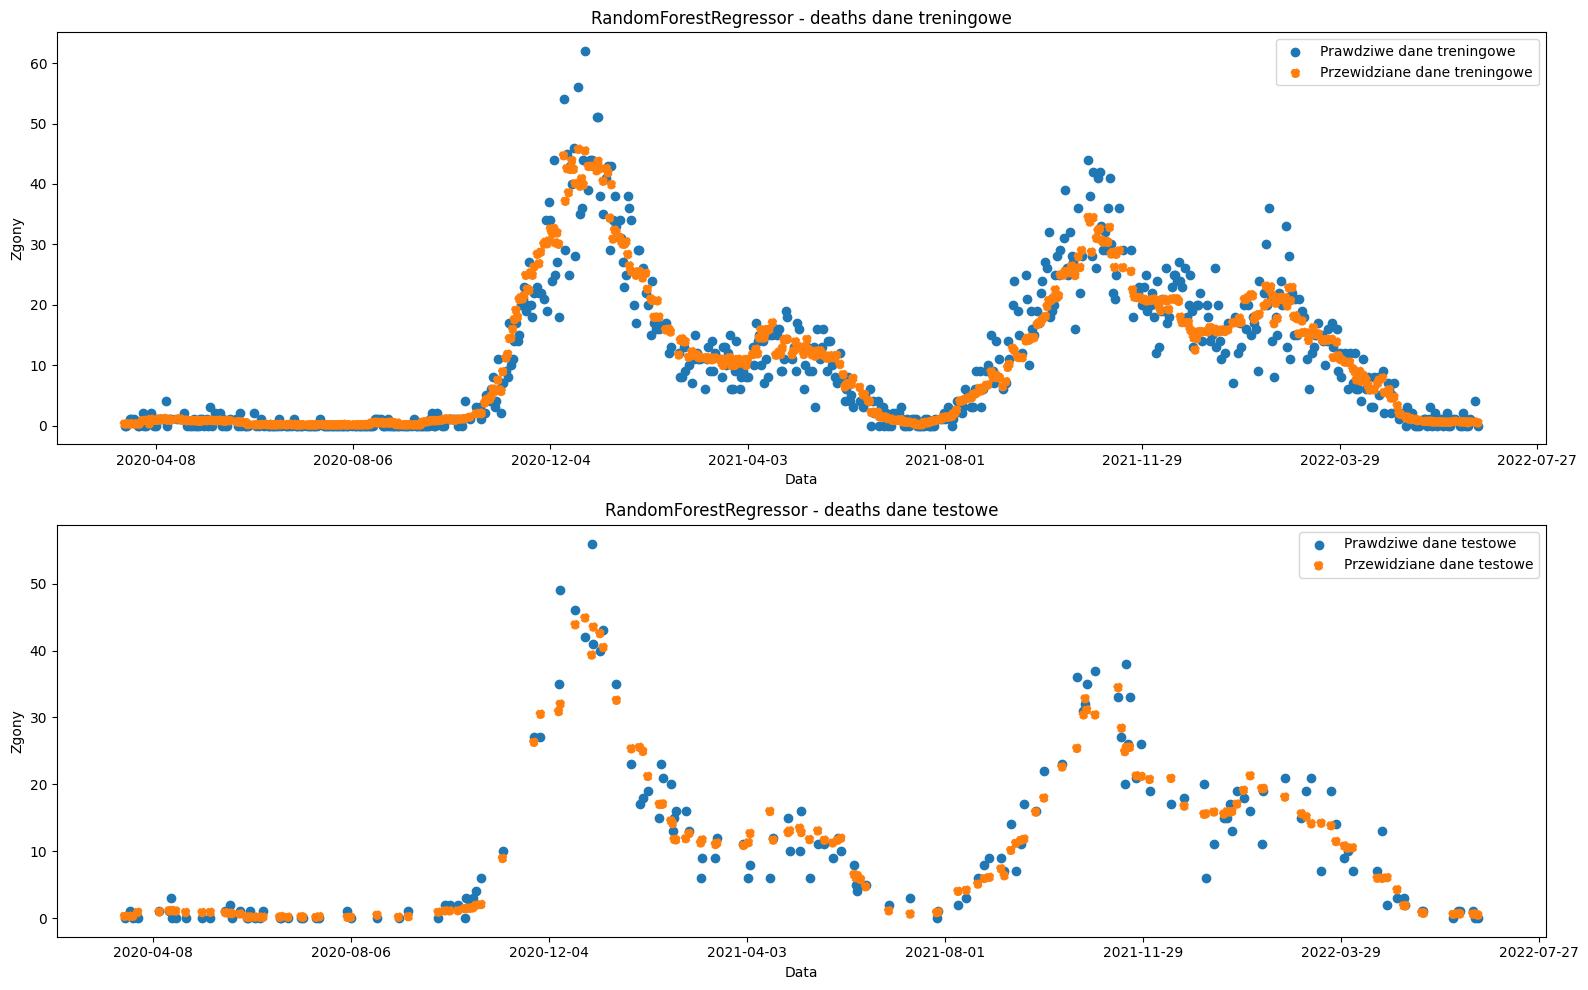

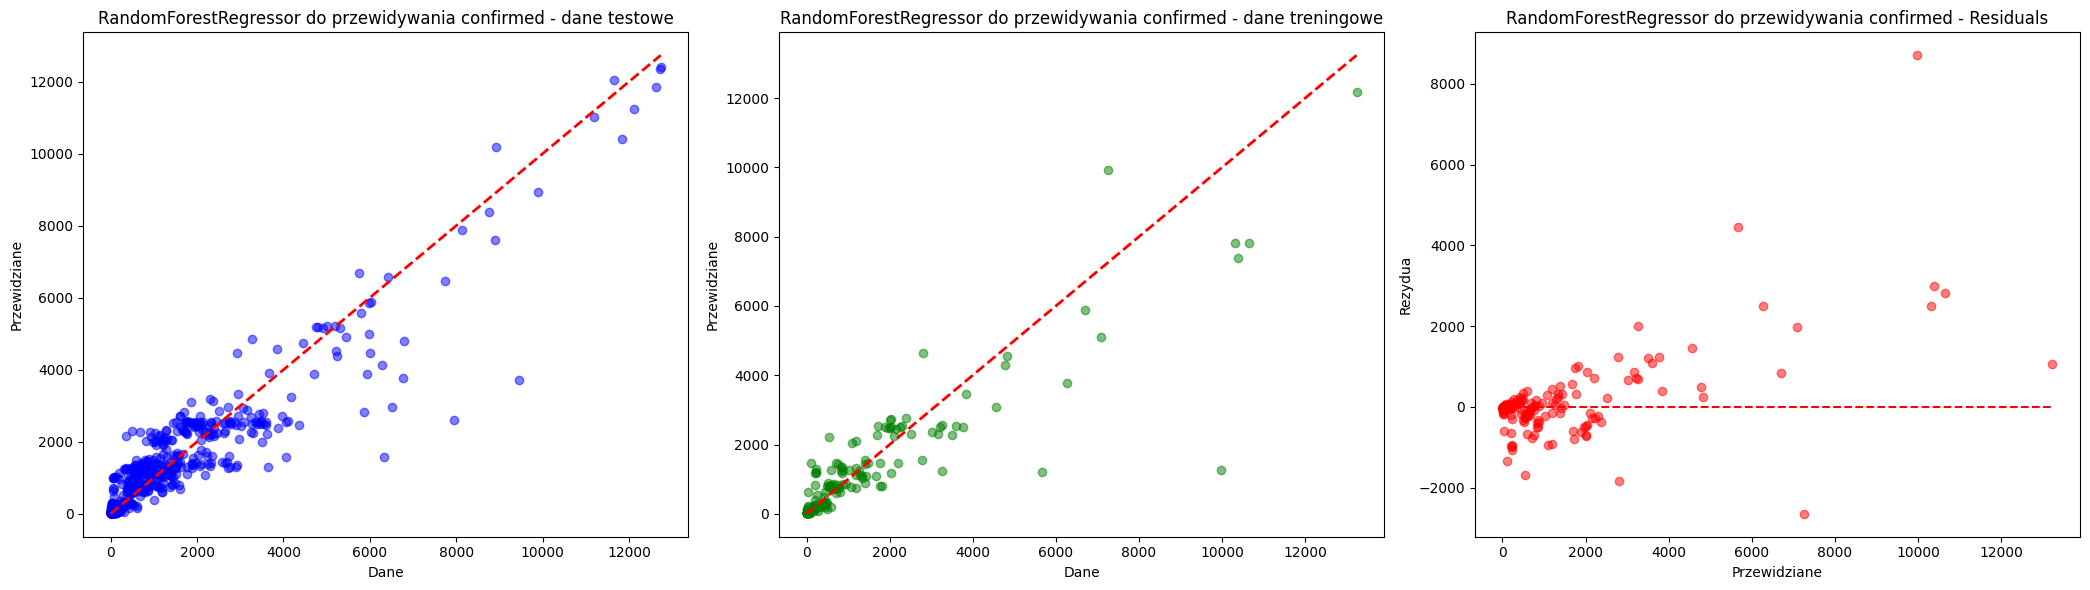

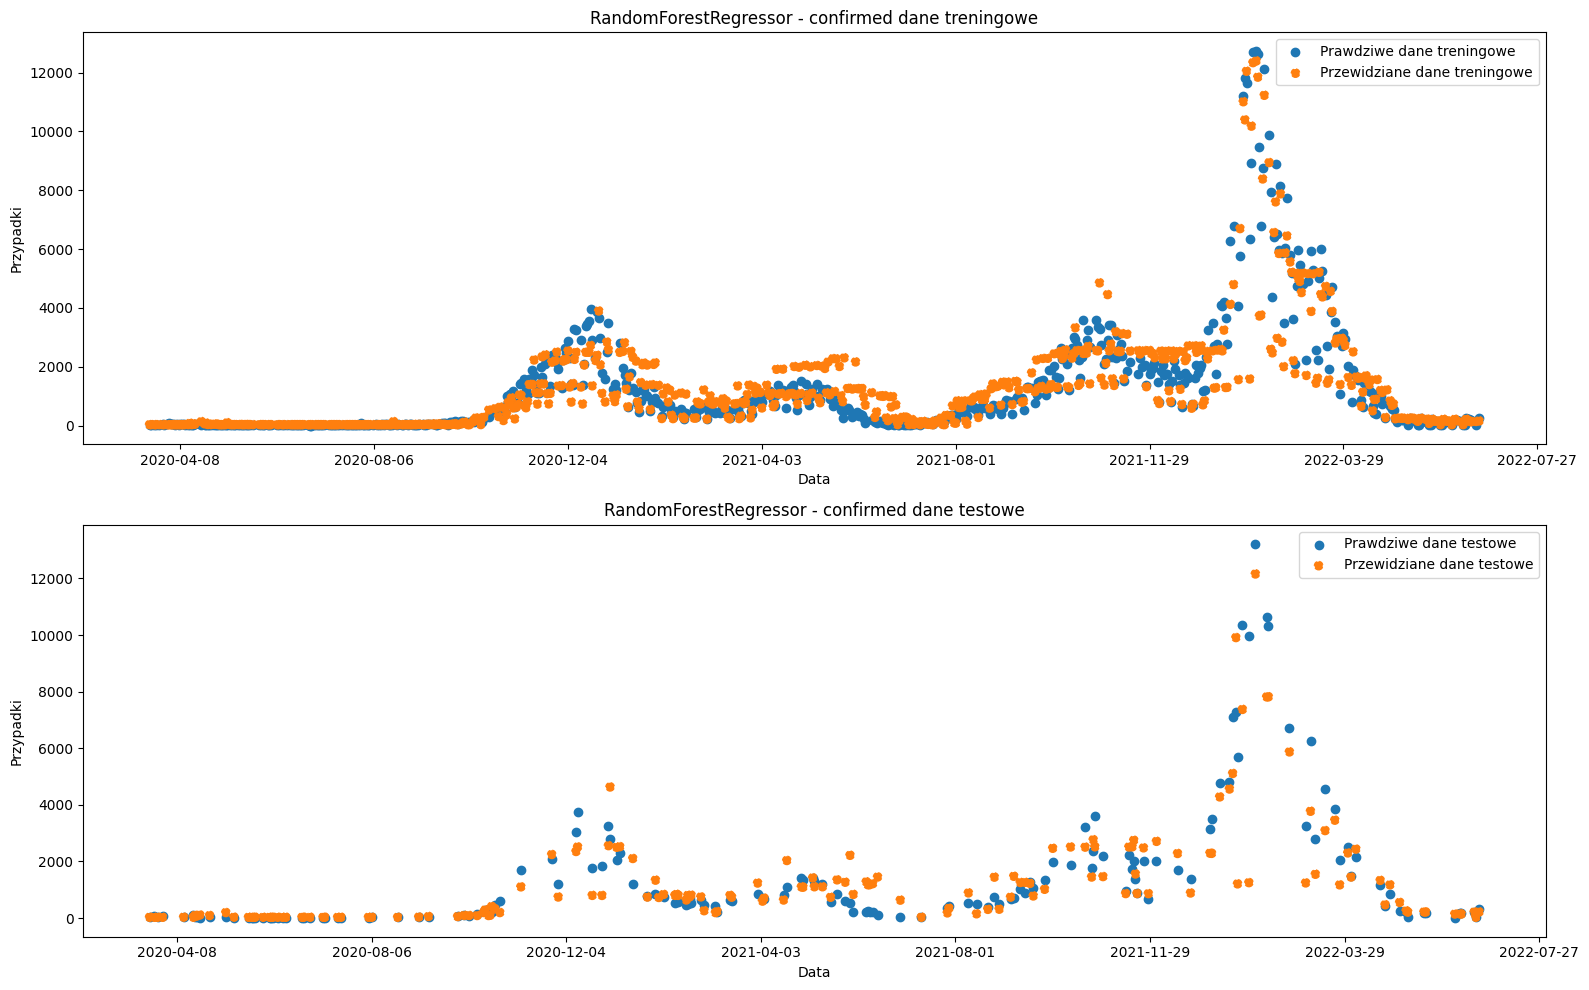

In [ ]:
forest = RandomForestRegressor(max_depth=5)
forest_metrics_deaths= evaluate_model(forest, X_train_deaths, X_test_deaths,
                                       y_train_deaths, y_test_deaths, 'deaths', dates_train_deaths, dates_test_deaths)
forest_metrics_cases= evaluate_model(forest, X_train_cases, X_test_cases,
                                      y_train_cases, y_test_cases, 'confirmed', dates_train_cases, dates_test_cases)

## Podsumowanie wyników

In [ ]:
assess_df = pd.DataFrame([poly_metrics_deaths, poly_metrics_cases, svr_metrics_deaths, svr_metrics_cases, tree_metrics_deaths, tree_metrics_cases, forest_metrics_deaths, forest_metrics_cases])
assess_df.round(2)

Model Predicted Variable   Train MSE    Test MSE  Train R2  \
0       LinearRegression             deaths       16.72       12.94      0.88   
1       LinearRegression          confirmed   736376.77  1098484.80      0.80   
2                    SVR             deaths       34.88       34.11      0.75   
3                    SVR          confirmed  1241668.35  1681476.61      0.67   
4  DecisionTreeRegressor             deaths       13.93       15.87      0.90   
5  DecisionTreeRegressor          confirmed   532544.92  1754723.79      0.86   
6  RandomForestRegressor             deaths       12.78       13.81      0.91   
7  RandomForestRegressor          confirmed   461430.83  1084841.65      0.88   

   Test R2  
0     0.91  
1     0.78  
2     0.77  
3     0.66  
4     0.89  
5     0.64  
6     0.91  
7     0.78